In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

pd.set_option('display.max_columns',100)

In [63]:
ames_train = pd.read_csv(r'F:\end to end data sets-20240302T041447Z-001\end to end data sets\ames_regression\ames_train.csv');
ames_test = pd.read_csv(r'F:\end to end data sets-20240302T041447Z-001\end to end data sets\ames_regression\ames_test.csv');

### Data Understanding
As we start our analysis, there are some basic features like, area in sft,size of the house, locality,age of the building, condition of the house which play a major role in determining the Sale price of a house in general. 

In [5]:
print(ames_train.shape)
print(ames_test.shape)

(1460, 81)
(1459, 80)


In [4]:
ames_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
ames_train.info()
# MSSubclass dtype needs to be changed from int64 to object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
ames_train.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,588,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,3,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,445,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,N

### Univariate Analysis

<Axes: ylabel='MSSubClass'>

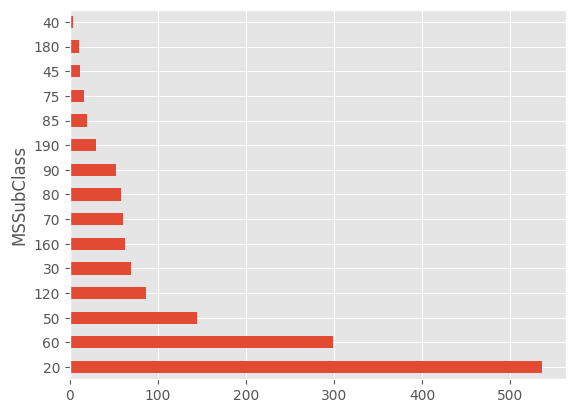

In [8]:
#MSSubClass is a categorical feature, will change the dtype from int64 to object
#id colum will not add any value to our model,so will drop it.

ames_train['MSSubClass'].value_counts().plot(kind = 'barh')

In [64]:
ames_train['MSSubClass'] = ames_train['MSSubClass'].apply(str)
ames_train['MSSubClass'].dtypes
ames_test['MSSubClass'] =ames_test['MSSubClass'].apply(str)

<Axes: xlabel='MSZoning'>

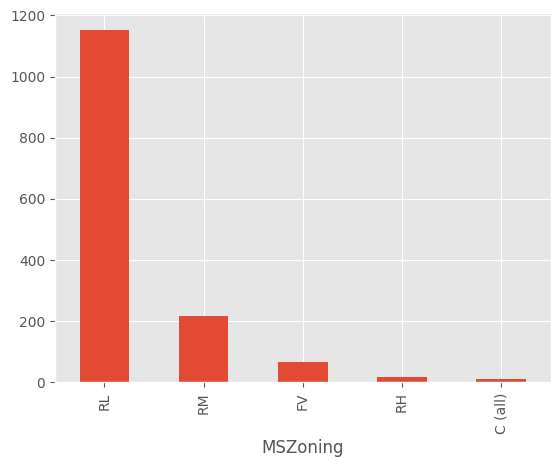

In [10]:
ames_train['MSZoning'].value_counts().plot(kind = 'bar')

<Axes: xlabel='LotFrontage', ylabel='Count'>

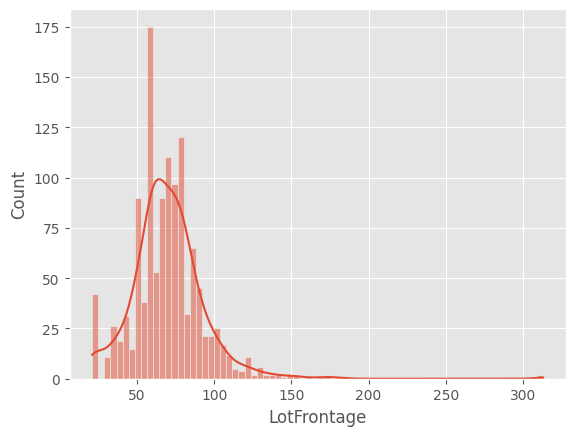

In [275]:
#it is right skewed distribution, will scale it later on.

sns.histplot(x = 'LotFrontage',data = ames_train, kde = True)


<Axes: xlabel='LotArea', ylabel='Count'>

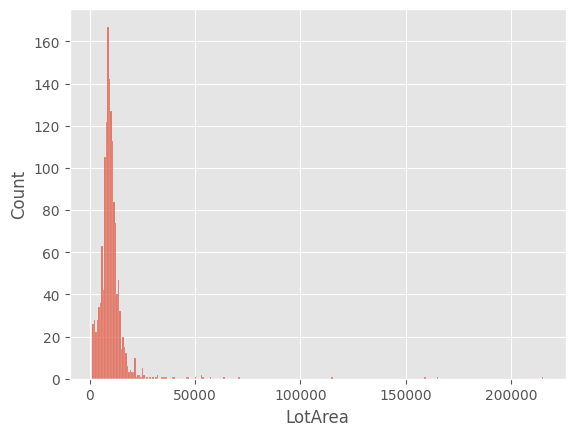

In [276]:
sns.histplot(x = 'LotArea',data = ames_train)
#LotArea is highly skewed, will scale it as well.

<Axes: xlabel='Street'>

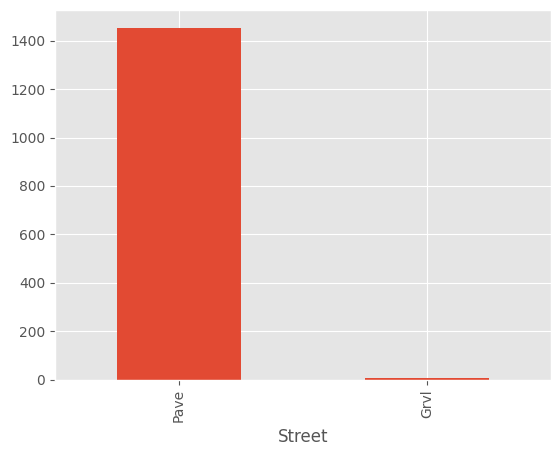

In [277]:
#will remove this feature as it has only one data-heavy class
ames_train['Street'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='Alley'>

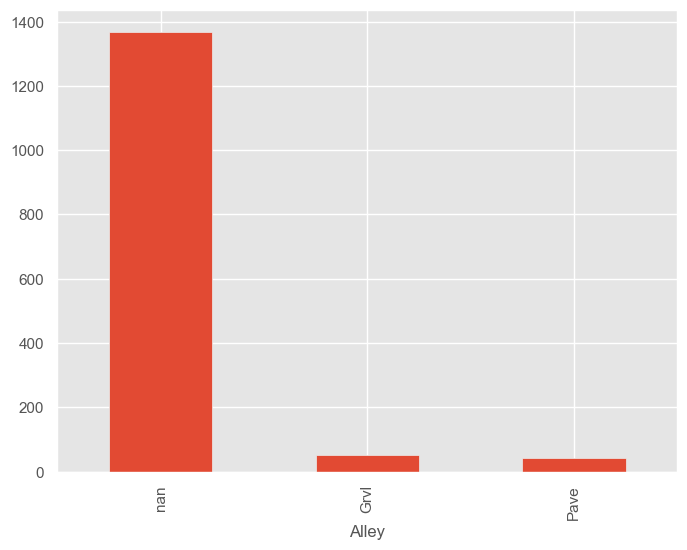

In [137]:
ames_train['Alley'].value_counts(dropna = False).plot(kind = 'bar')
# will change Nan to No

<Axes: xlabel='LotShape'>

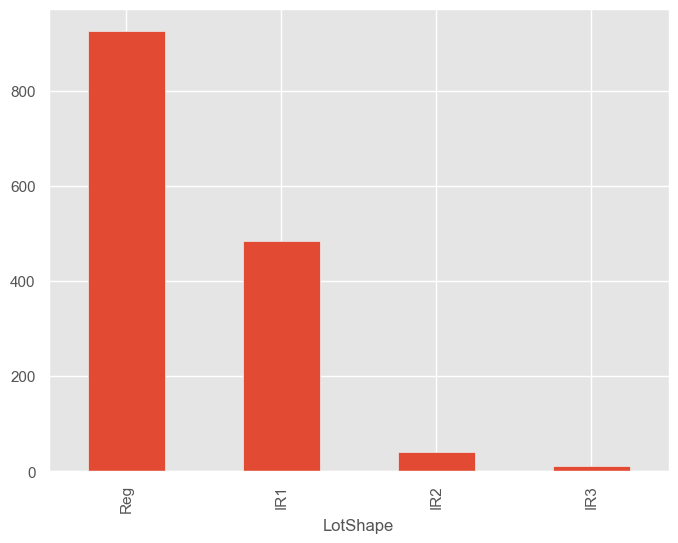

In [138]:
ames_train['LotShape'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='LandContour'>

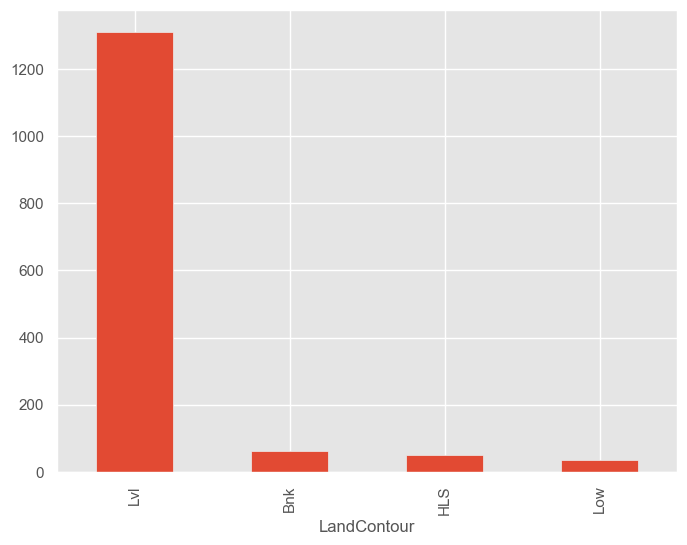

In [139]:
ames_train['LandContour'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='Utilities'>

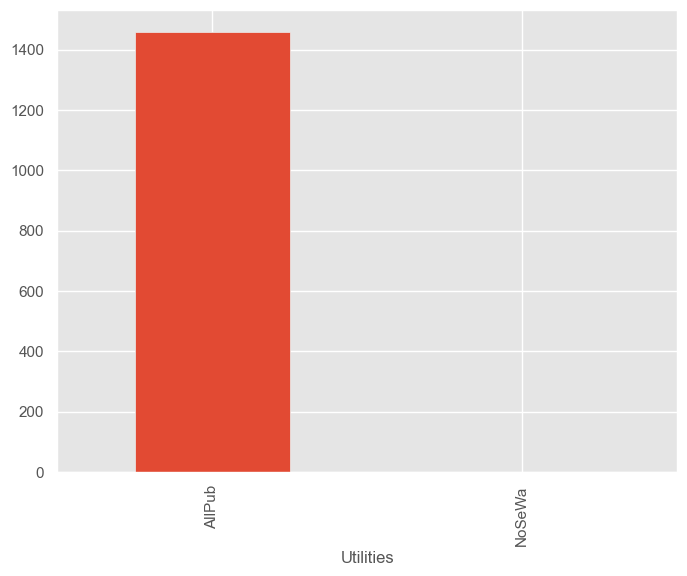

In [140]:
# will remove Utilities

ames_train['Utilities'].value_counts(dropna = False).plot(kind = 'bar')


<Axes: xlabel='LotConfig'>

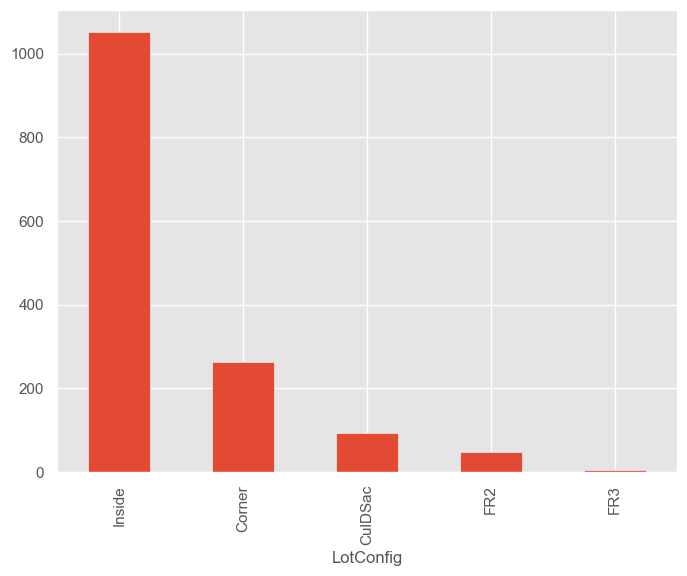

In [141]:
ames_train['LotConfig'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='LandSlope'>

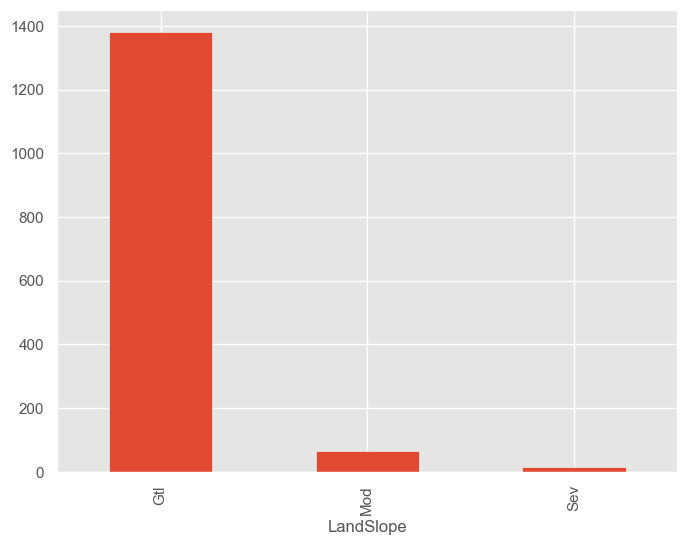

In [142]:
ames_train['LandSlope'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='Neighborhood'>

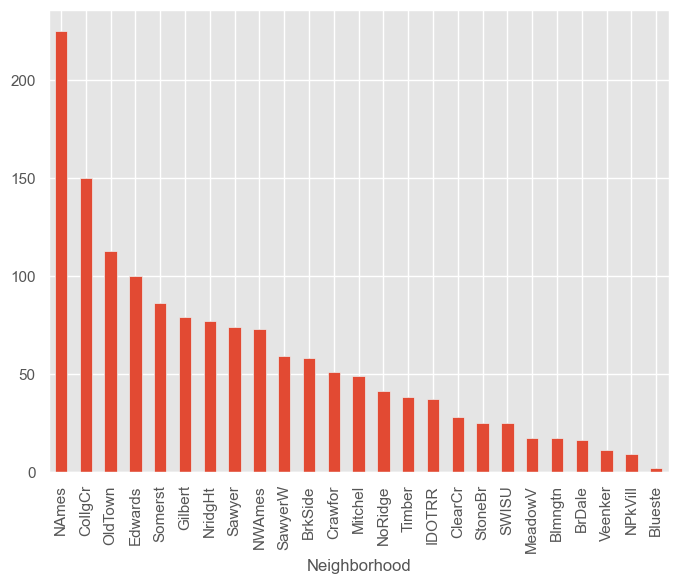

In [143]:
#Here we can see in which neighborhoods most of the houses are.
ames_train['Neighborhood'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='Condition1'>

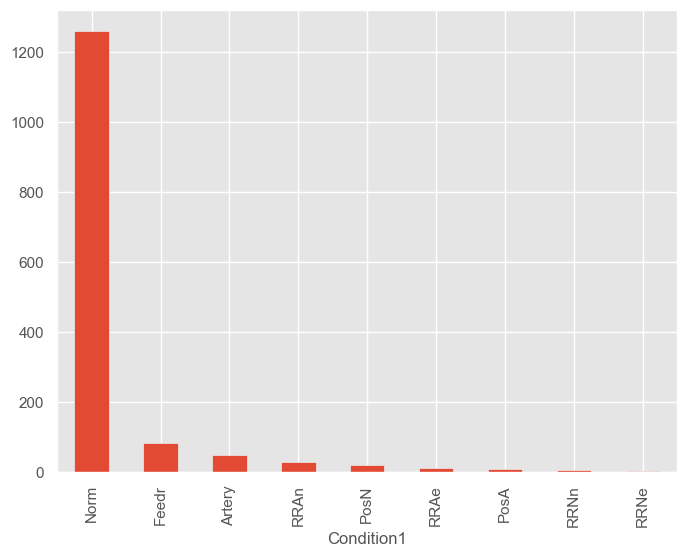

In [144]:
 ames_train['Condition1'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='Condition2'>

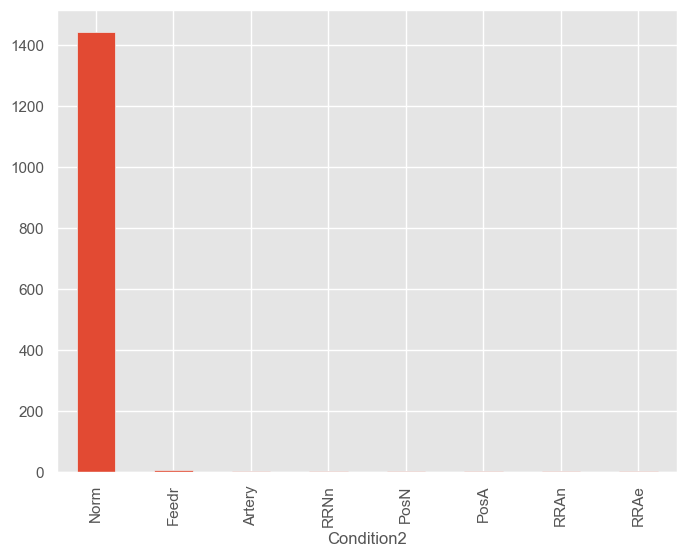

In [145]:
ames_train['Condition2'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='BldgType'>

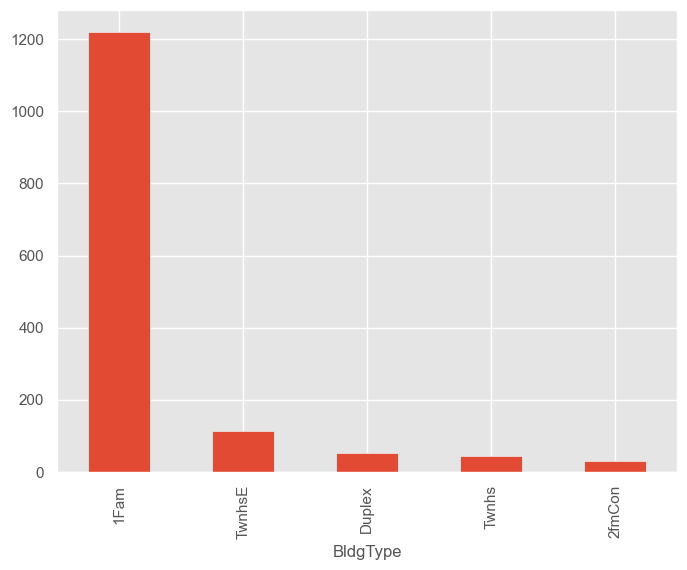

In [146]:
 ames_train['BldgType'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='HouseStyle'>

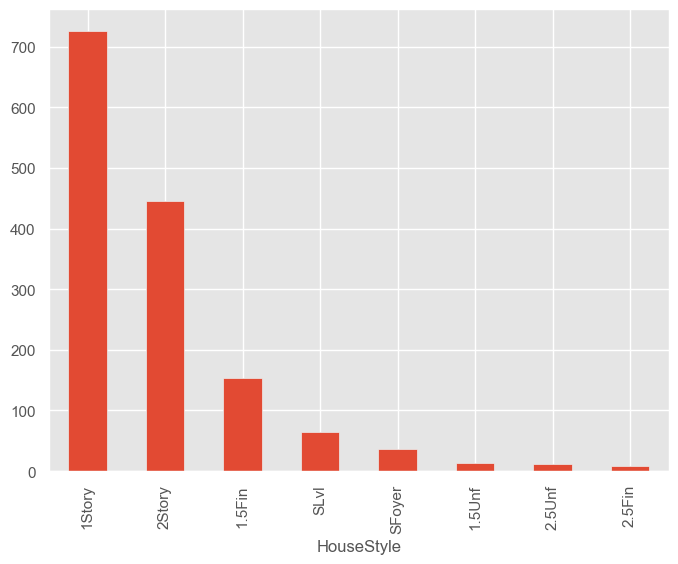

In [147]:
 ames_train['HouseStyle'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='OverallQual', ylabel='Count'>

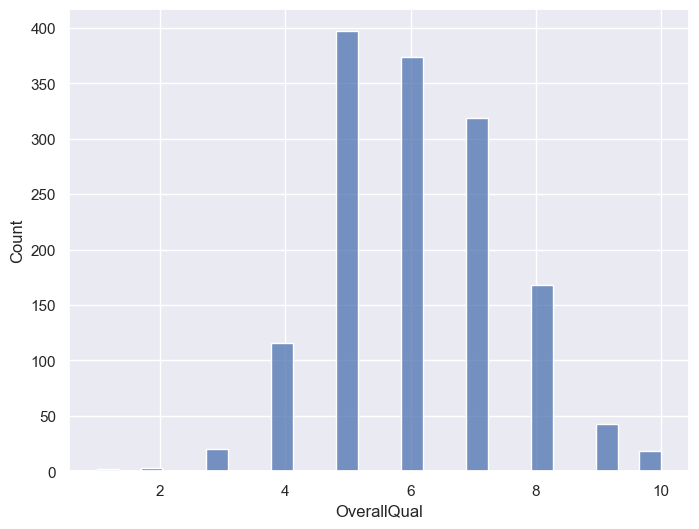

In [11]:
sns.set(rc={'figure.figsize': (8,6)})
sns.histplot(x = 'OverallQual',data = ames_train)

In [65]:
ames_train['OverallQual'] = ames_train['OverallQual'].apply(str)
ames_train['OverallQual'].dtypes
ames_test['OverallQual'] = ames_test['OverallQual'].apply(str)

<Axes: xlabel='OverallCond', ylabel='Count'>

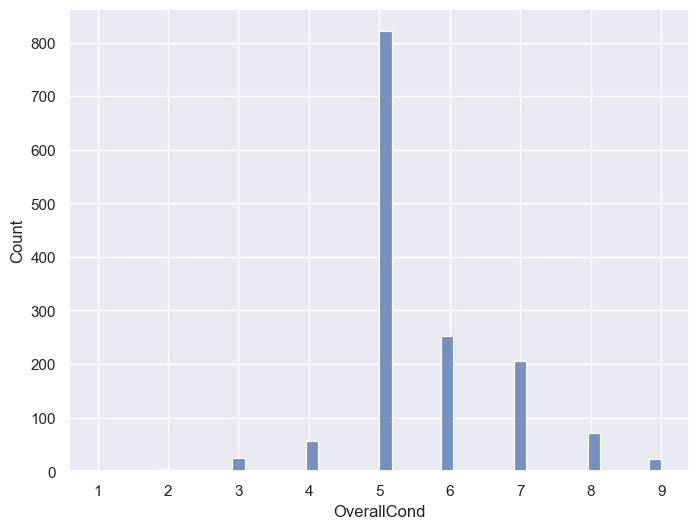

In [13]:
sns.set(rc={'figure.figsize': (8,6)})
sns.histplot(x = 'OverallCond',data = ames_train)

In [66]:
ames_train['OverallCond'] = ames_train['OverallCond'].apply(str)
ames_test['OverallCond'] = ames_test['OverallCond'].apply(str)

<Axes: xlabel='YearBuilt', ylabel='Count'>

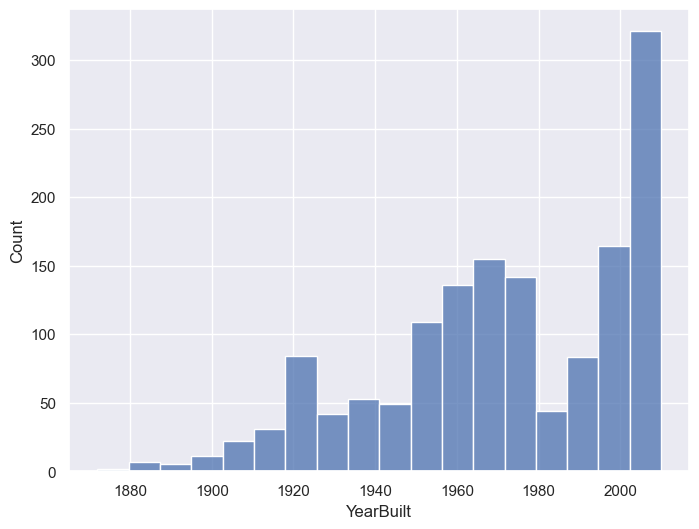

In [152]:
sns.set(rc={'figure.figsize': (8,6)})
sns.histplot(x = 'YearBuilt',data = ames_train)

<Axes: xlabel='YearRemodAdd', ylabel='Count'>

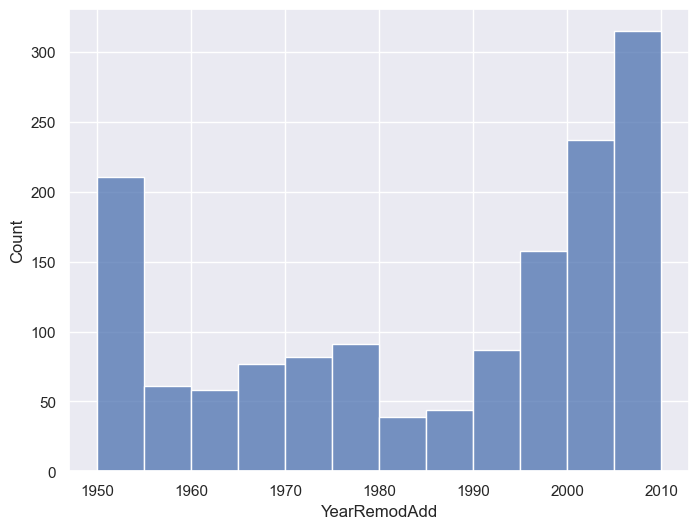

In [153]:
sns.set(rc={'figure.figsize': (8,6)})
sns.histplot(x = 'YearRemodAdd',data = ames_train)

<Axes: xlabel='RoofStyle'>

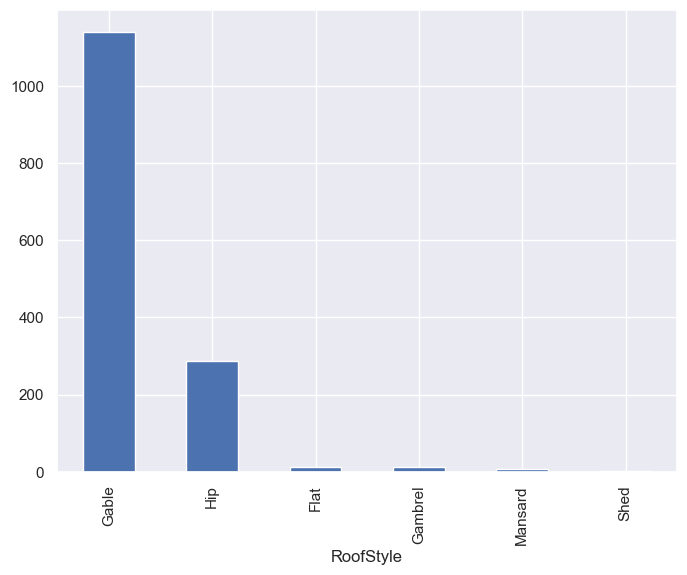

In [154]:
ames_train['RoofStyle'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='RoofMatl'>

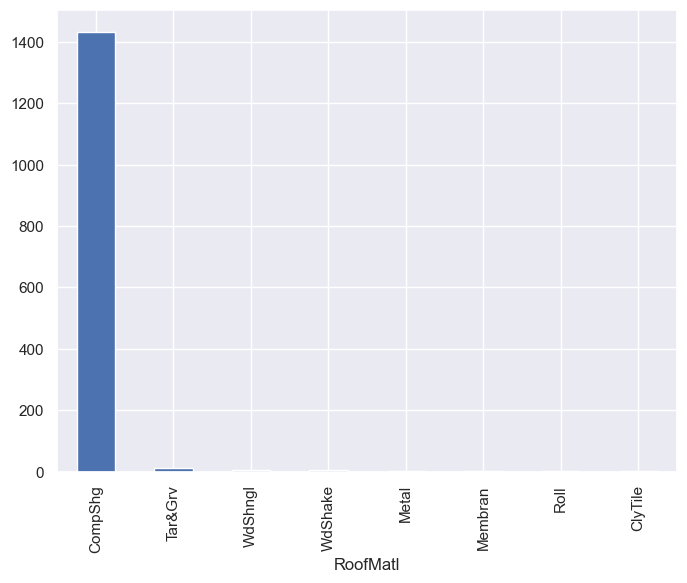

In [155]:
ames_train['RoofMatl'].value_counts(dropna = False).plot(kind = 'bar')
# will remove RoofMatl

<Axes: xlabel='Exterior1st'>

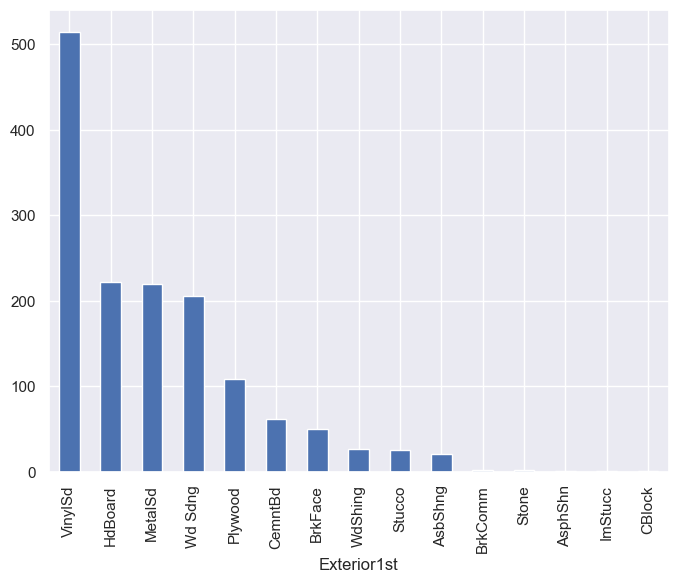

In [156]:
ames_train['Exterior1st'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='Exterior2nd'>

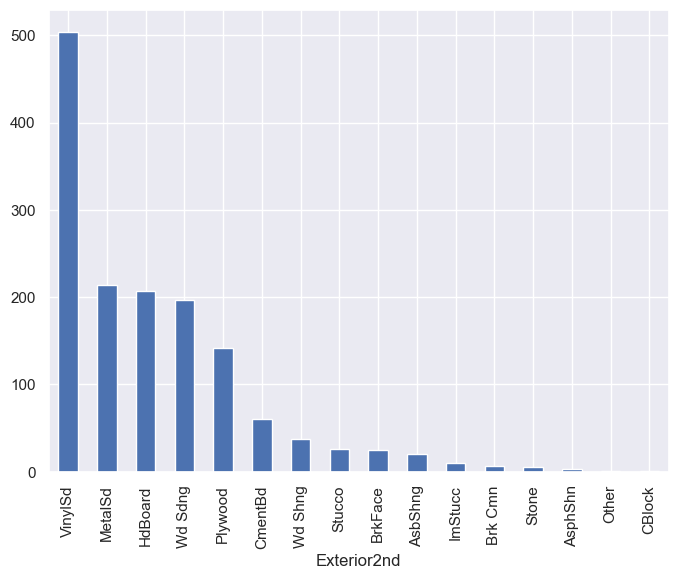

In [157]:
ames_train['Exterior2nd'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='MasVnrType'>

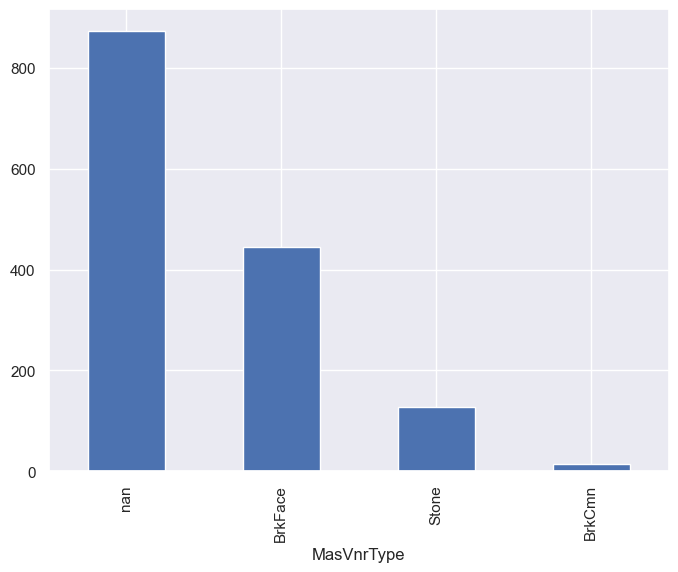

In [158]:
ames_train['MasVnrType'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='MasVnrArea', ylabel='Count'>

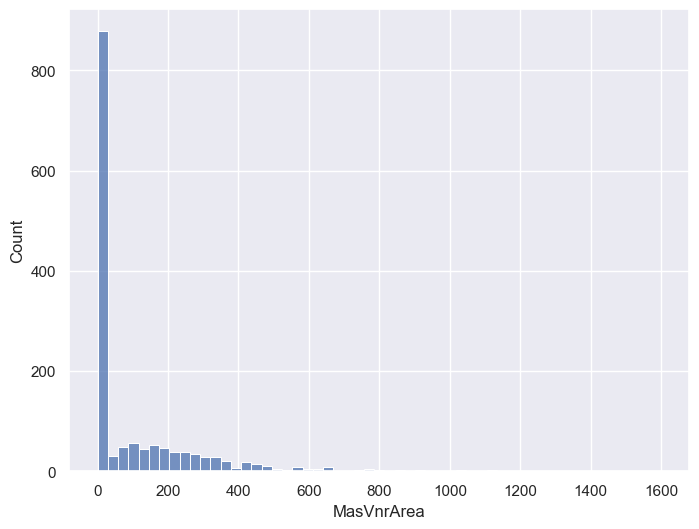

In [159]:
sns.histplot(x = 'MasVnrArea',data = ames_train)

In [80]:
ames_train['MasVnrArea'].describe()
#looks like it has some Nan values, will take care of it.

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [175]:
ames_train[ames_train['MasVnrArea']== 0] #it means majority of the property has no masonry vaneer construction


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,No,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,No,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,No,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,No,Attchd,Unf,2,480,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,No,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,Unf,2,468,Fa,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,No,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,RFn,1,205,Gd,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,No,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,No,Attchd,RFn,2,400,TA,Y,0,113,0,0,0,0,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,No,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,RFn,2,460,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,No,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,RFn,1,252,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,No,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,No,Attchd,Unf,1,240,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


<Axes: xlabel='ExterQual'>

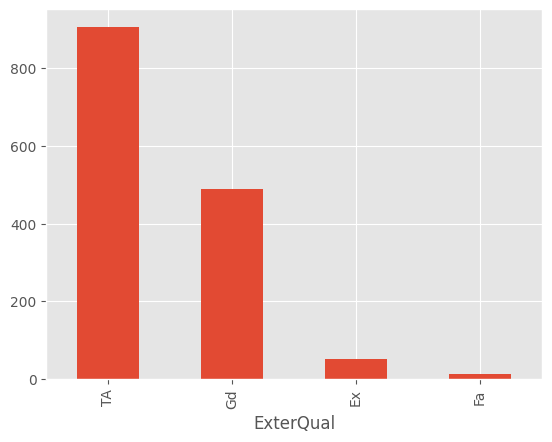

In [13]:
ames_train['ExterQual'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='ExterCond'>

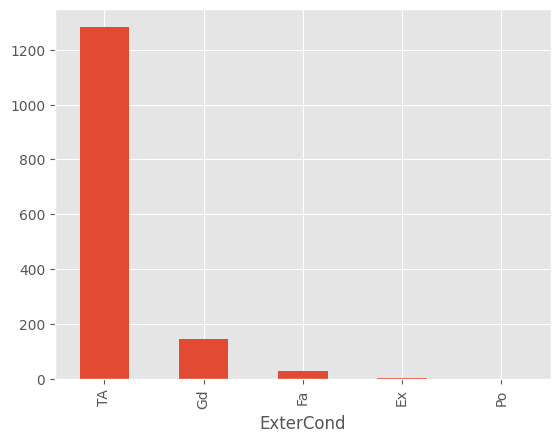

In [14]:
ames_train['ExterCond'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='Foundation'>

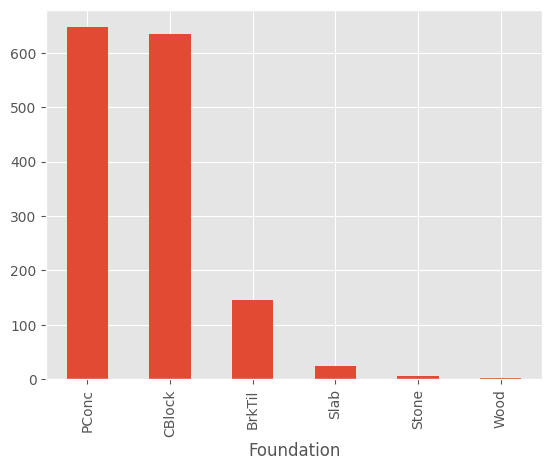

In [15]:
ames_train['Foundation'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='BsmtQual'>

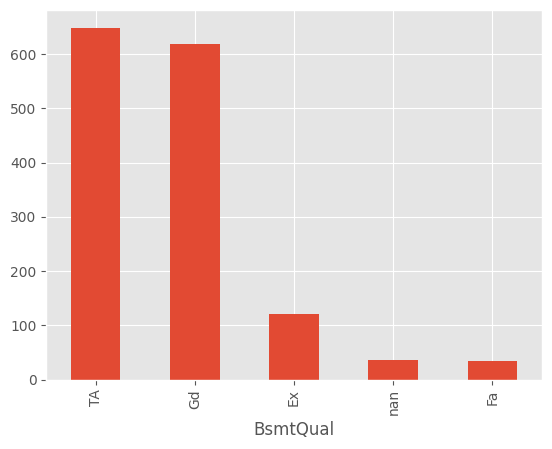

In [16]:
ames_train['BsmtQual'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='BsmtCond'>

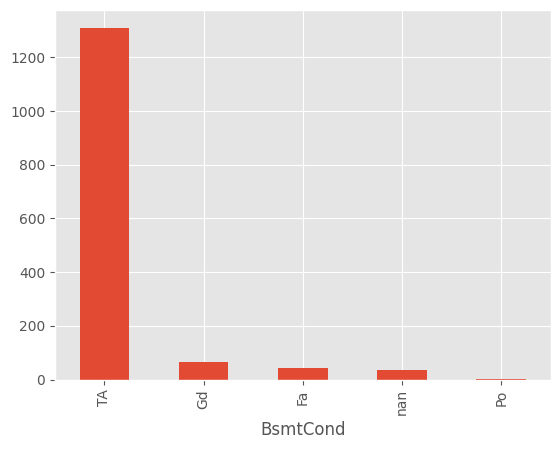

In [17]:
ames_train['BsmtCond'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='BsmtExposure'>

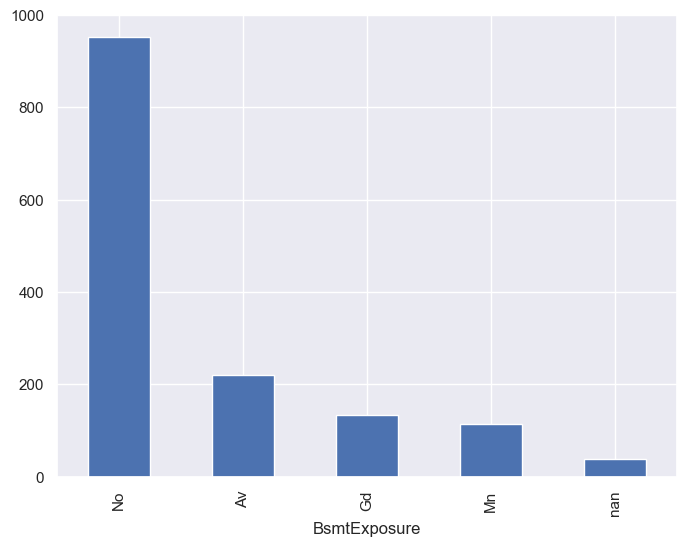

In [167]:
ames_train['BsmtExposure'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='BsmtFinType1'>

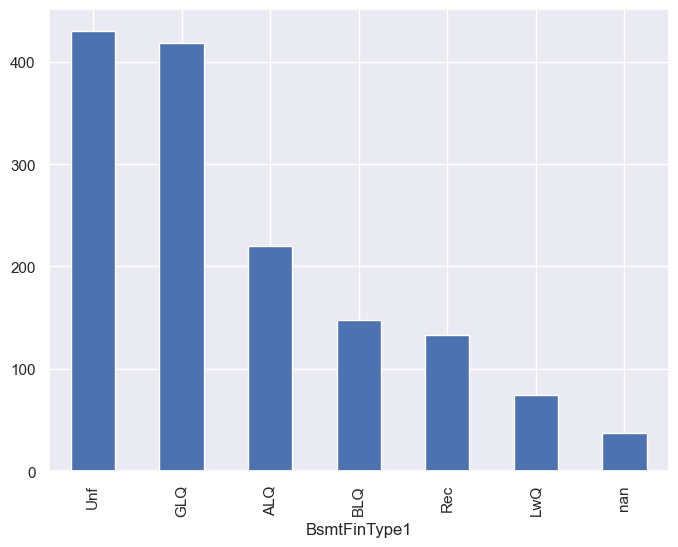

In [168]:
ames_train['BsmtFinType1'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='BsmtFinSF1', ylabel='Count'>

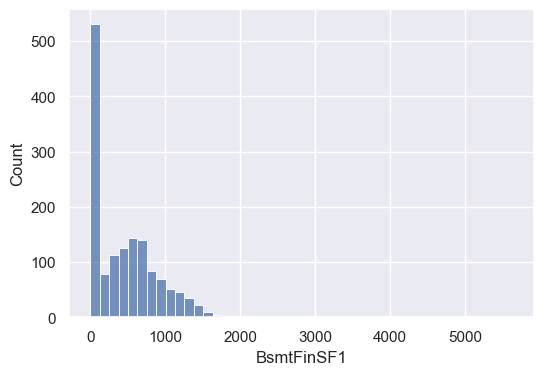

In [169]:
sns.set(rc={'figure.figsize': (6,4)})
sns.histplot(x = 'BsmtFinSF1',data = ames_train)
# we will scale this numeric column

<Axes: xlabel='BsmtFinType2'>

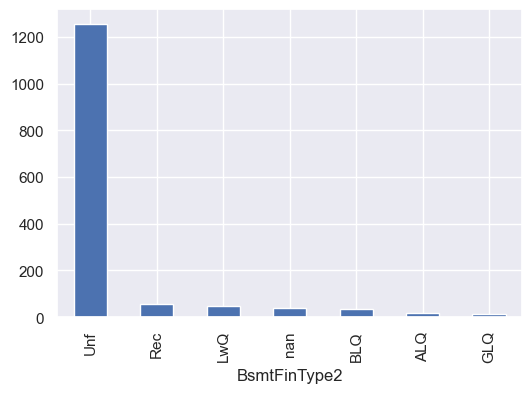

In [170]:
ames_train['BsmtFinType2'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='BsmtFinSF2', ylabel='Count'>

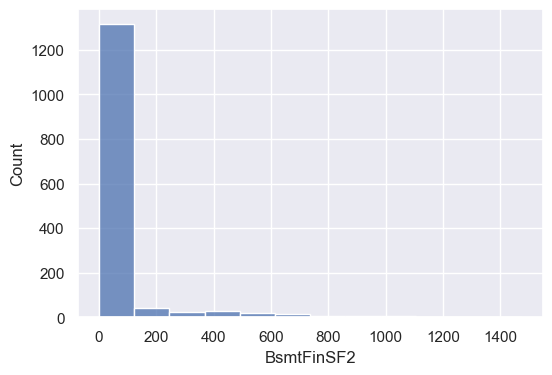

In [171]:
sns.set(rc={'figure.figsize': (6,4)})
sns.histplot(x = 'BsmtFinSF2',data = ames_train)

<Axes: xlabel='BsmtUnfSF', ylabel='Count'>

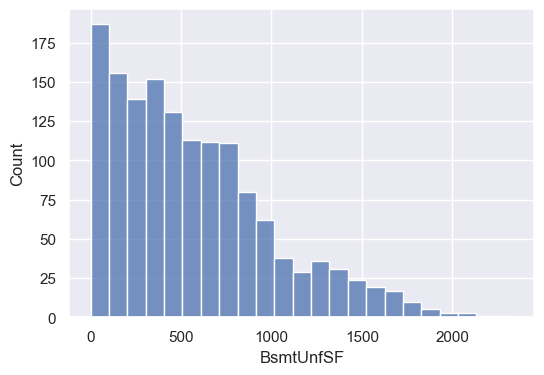

In [172]:
sns.histplot(x = 'BsmtUnfSF',data = ames_train)

<Axes: xlabel='TotalBsmtSF', ylabel='Count'>

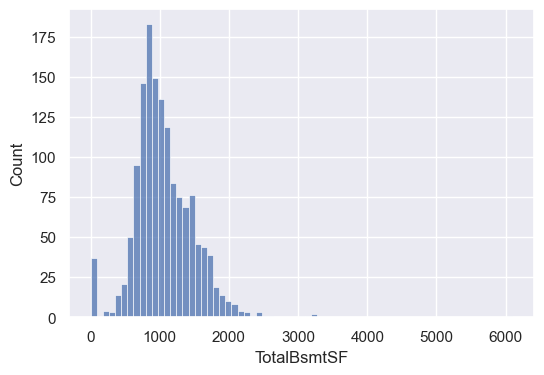

In [173]:
sns.histplot(x = 'TotalBsmtSF',data = ames_train)

<Axes: xlabel='Heating'>

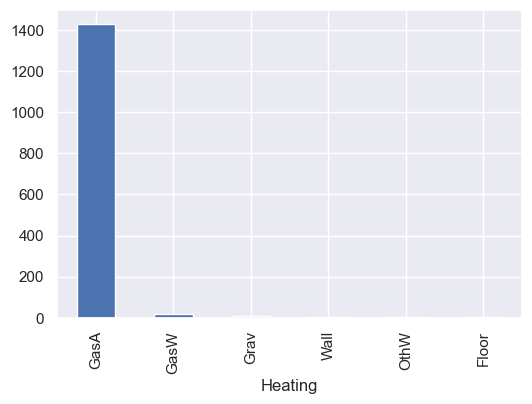

In [174]:
ames_train['Heating'].value_counts(dropna = False).plot(kind = 'bar')
#since it has majority of the values in one class, will remove it.

<Axes: xlabel='HeatingQC'>

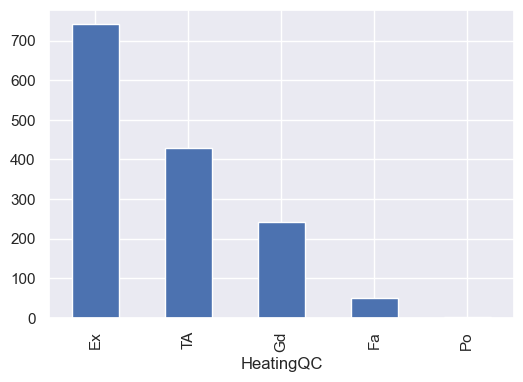

In [175]:
ames_train['HeatingQC'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='CentralAir'>

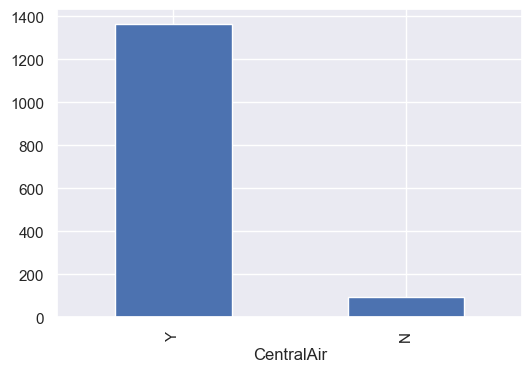

In [176]:
ames_train['CentralAir'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='Electrical'>

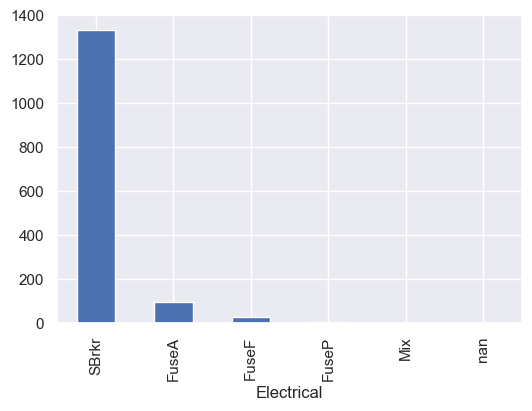

In [177]:
ames_train['Electrical'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='1stFlrSF', ylabel='Count'>

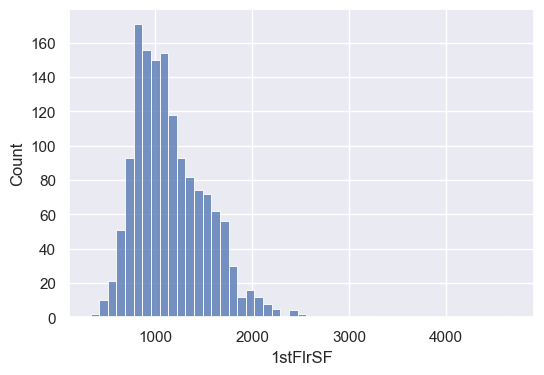

In [178]:
sns.histplot(x = '1stFlrSF',data = ames_train)
#right skewed distribution, needs to be scaled

<Axes: xlabel='2ndFlrSF', ylabel='Count'>

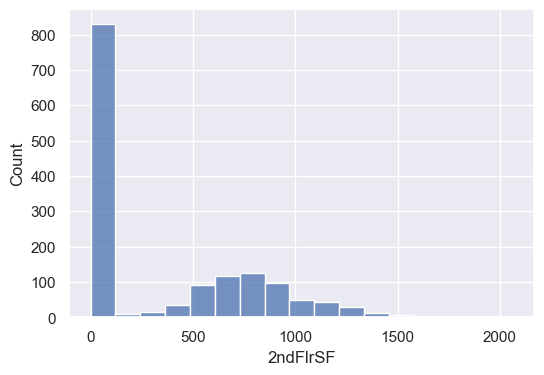

In [179]:
sns.histplot(x = '2ndFlrSF',data = ames_train)

<Axes: xlabel='LowQualFinSF', ylabel='Count'>

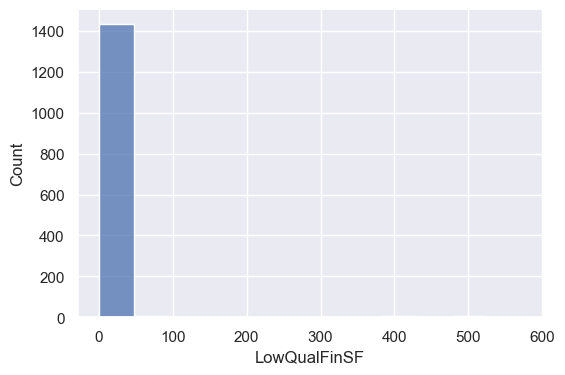

In [180]:
sns.histplot(x = 'LowQualFinSF',data = ames_train)
#we propably remove it

<Axes: xlabel='GrLivArea', ylabel='Count'>

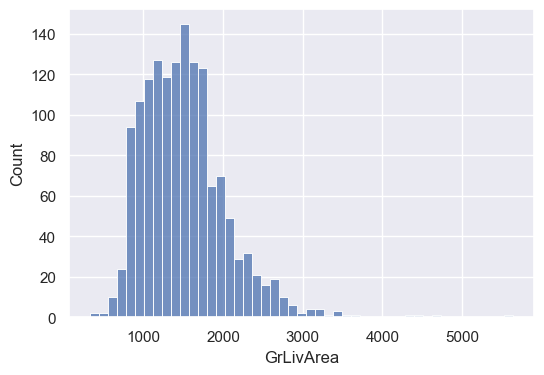

In [181]:
sns.histplot(x = 'GrLivArea',data = ames_train)

<Axes: xlabel='BsmtFullBath'>

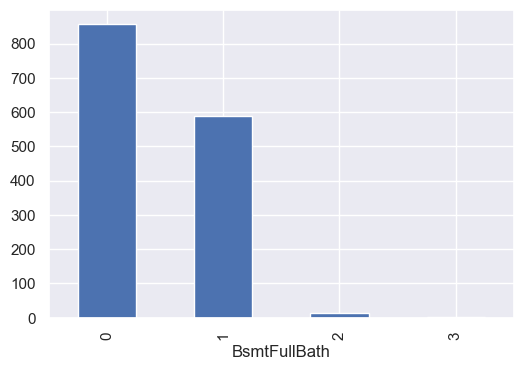

In [182]:

ames_train['BsmtFullBath'].value_counts(dropna = False).plot(kind = 'bar')


In [183]:
# Changing the dtype from int64 to object,as it is a categorical column
#ames_train['BsmtFullBath'] = ames_train['BsmtFullBath'].apply(str)

<Axes: xlabel='BsmtHalfBath'>

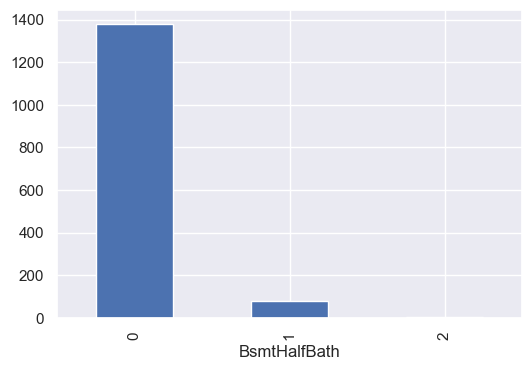

In [184]:
ames_train['BsmtHalfBath'].value_counts(dropna = False).plot(kind = 'bar')

In [185]:
#changing the dtype from int64 to object
#ames_train['BsmtHalfBath'] = ames_train['BsmtHalfBath'].apply(str)

<Axes: xlabel='FullBath'>

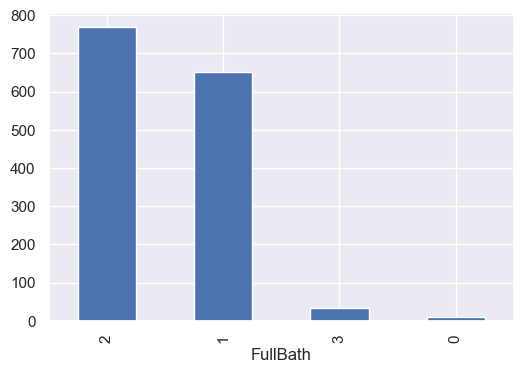

In [186]:
ames_train['FullBath'].value_counts(dropna = False).plot(kind = 'bar')

In [187]:
#ames_train['FullBath'] = ames_train['FullBath'].apply(str)

<Axes: xlabel='HalfBath'>

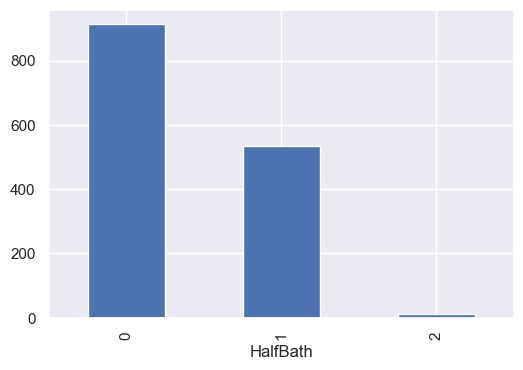

In [188]:
ames_train['HalfBath'].value_counts(dropna = False).plot(kind = 'bar')

In [189]:
#ames_train['HalfBath'] = ames_train['HalfBath'].apply(str)

<Axes: xlabel='BedroomAbvGr'>

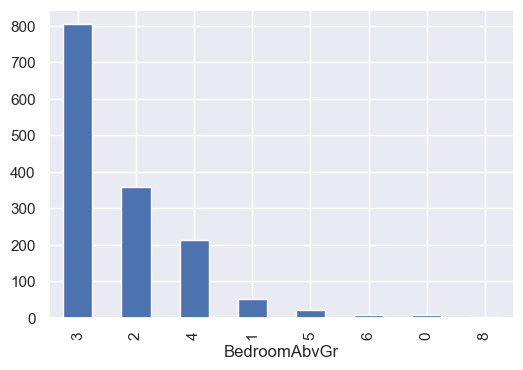

In [190]:
ames_train['BedroomAbvGr'].value_counts(dropna = False).plot(kind = 'bar')

In [191]:
#ames_train['BedroomAbvGr'] = ames_train['BedroomAbvGr'].apply(str)

<Axes: xlabel='KitchenAbvGr'>

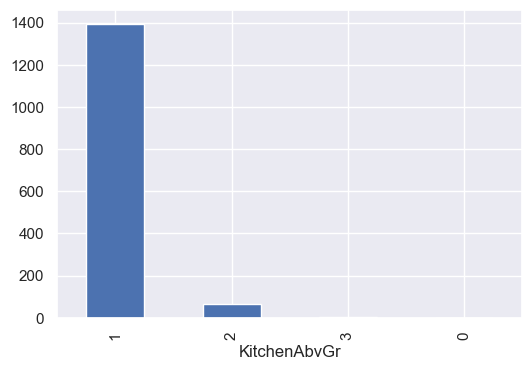

In [192]:
ames_train['KitchenAbvGr'].value_counts(dropna = False).plot(kind = 'bar')

In [193]:
#ames_train['KitchenAbvGr'] = ames_train['KitchenAbvGr'].apply(str)

<Axes: xlabel='KitchenQual'>

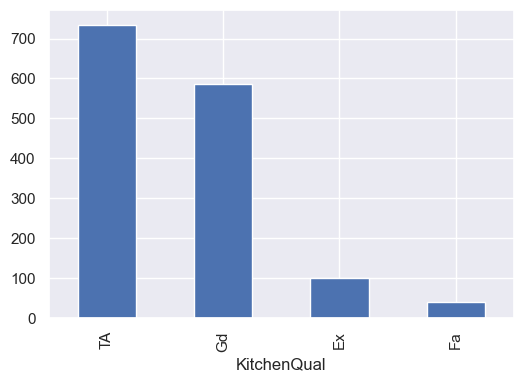

In [194]:
ames_train['KitchenQual'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='TotRmsAbvGrd'>

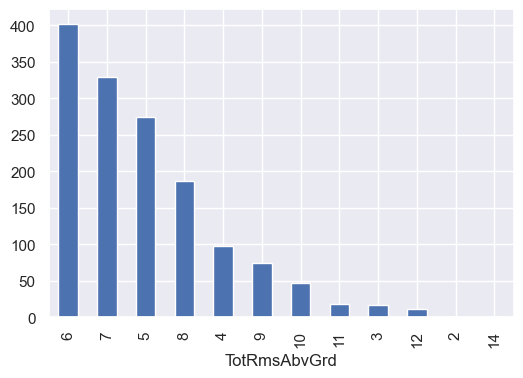

In [195]:
ames_train['TotRmsAbvGrd'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='Functional'>

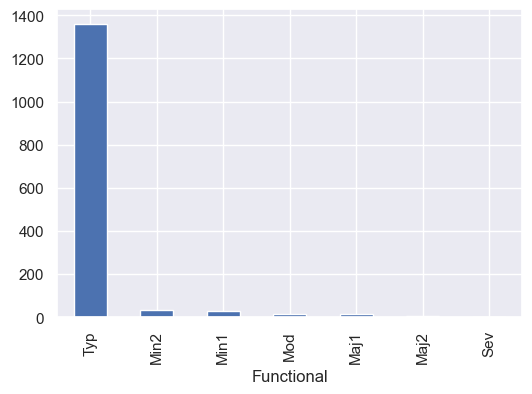

In [196]:
ames_train['Functional'].value_counts(dropna = False).plot(kind = 'bar')
#will remove this feature as it has one data heavy class,which will not help in learning

<Axes: xlabel='Fireplaces'>

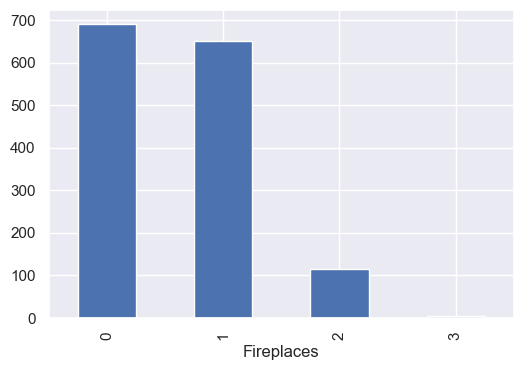

In [197]:
ames_train['Fireplaces'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='FireplaceQu'>

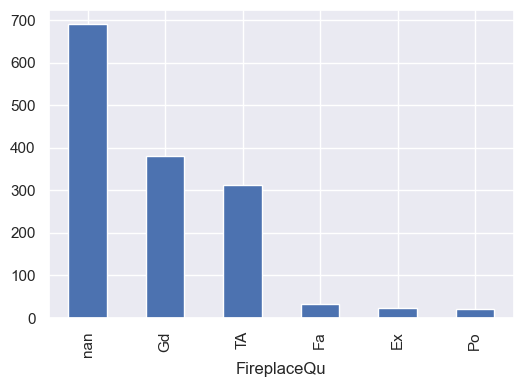

In [198]:
ames_train['FireplaceQu'].value_counts(dropna = False).plot(kind = 'bar')
#will change nan to No 

<Axes: xlabel='GarageType'>

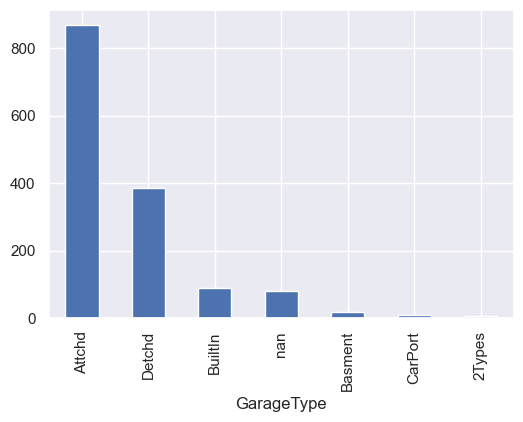

In [199]:
ames_train['GarageType'].value_counts(dropna = False).plot(kind = 'bar')
#will change nan to No 

<Axes: xlabel='GarageYrBlt', ylabel='Count'>

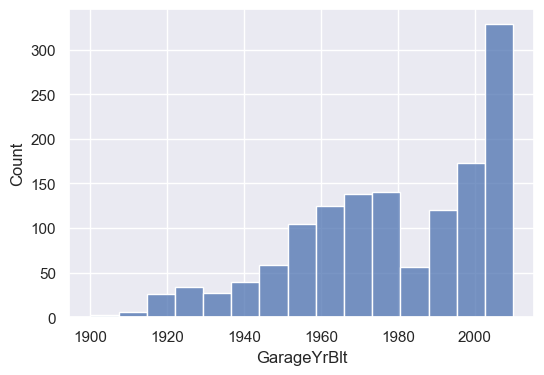

In [200]:
sns.histplot(x='GarageYrBlt',data = ames_train)

<Axes: xlabel='GarageFinish'>

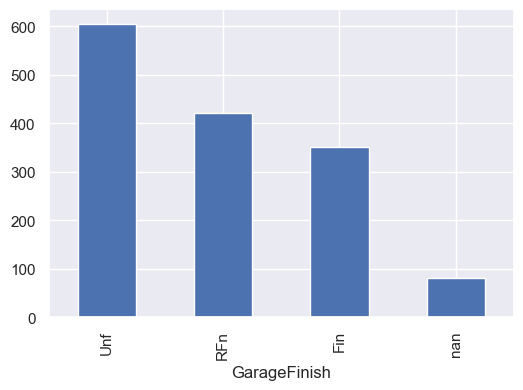

In [201]:
ames_train['GarageFinish'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='GarageCars'>

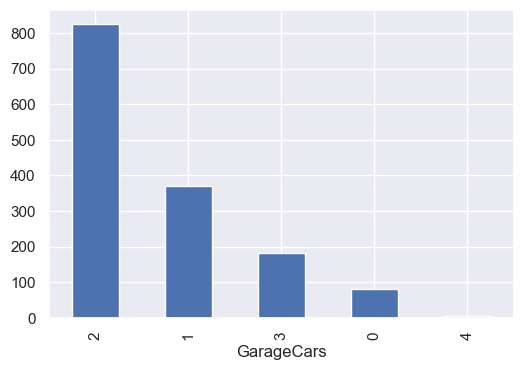

In [202]:
ames_train['GarageCars'].value_counts(dropna = False).plot(kind = 'bar')

In [203]:
#since it is an ordinal feature,will change it to object
#ames_train['GarageCars'] = ames_train['GarageCars'].apply(str)

<Axes: xlabel='GarageArea', ylabel='Count'>

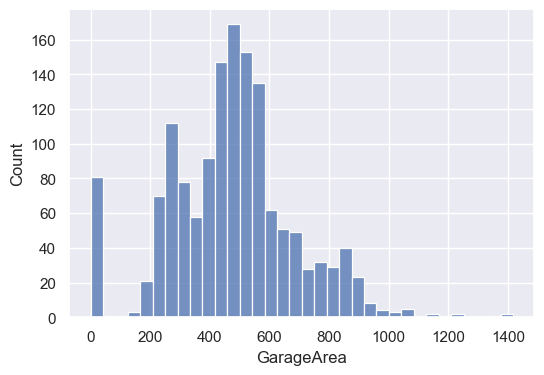

In [204]:
sns.histplot(x='GarageArea',data = ames_train)

<Axes: xlabel='GarageQual'>

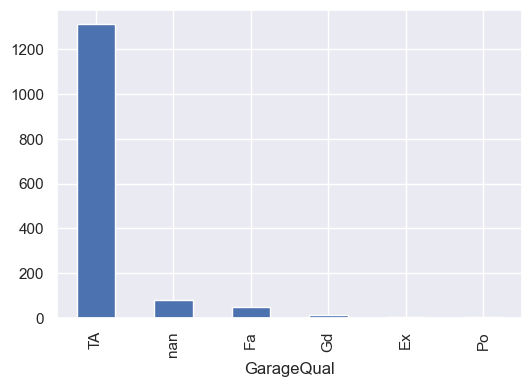

In [205]:
ames_train['GarageQual'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='GarageCond'>

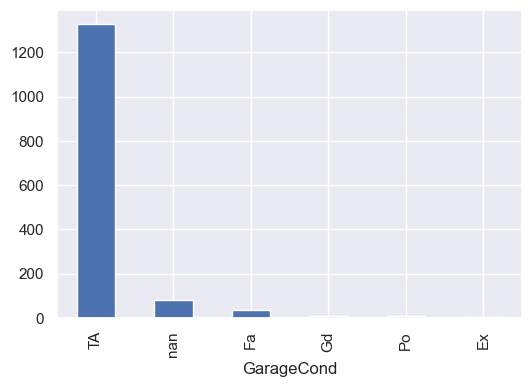

In [206]:
ames_train['GarageCond'].value_counts(dropna = False).plot(kind = 'bar')
#will remove GarageCond as it is similar to GarageQual 

<Axes: xlabel='PavedDrive'>

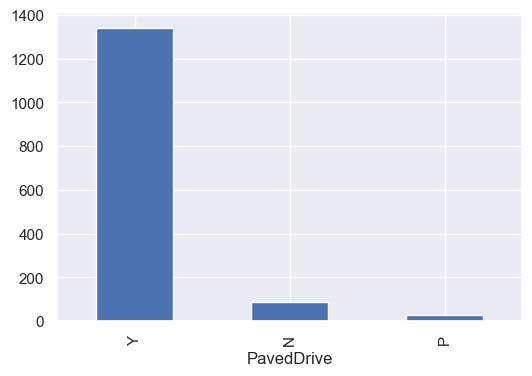

In [207]:
ames_train['PavedDrive'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='WoodDeckSF', ylabel='Count'>

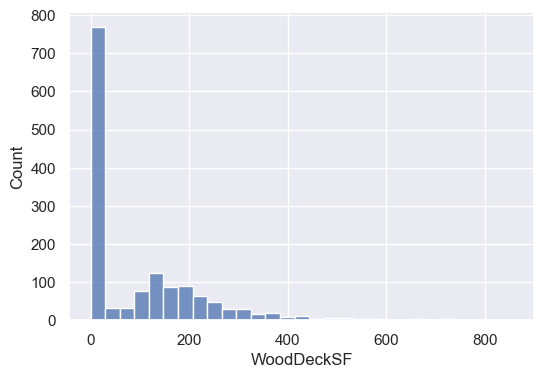

In [208]:
sns.histplot(x='WoodDeckSF',data = ames_train)

<Axes: xlabel='OpenPorchSF', ylabel='Count'>

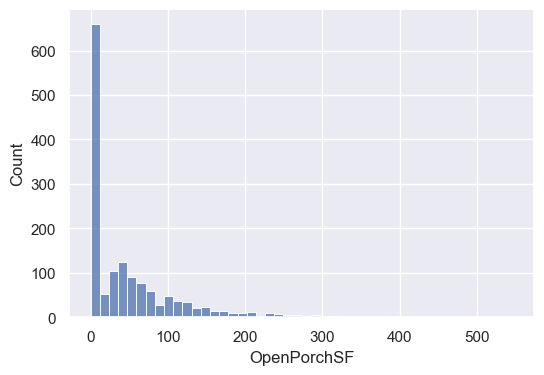

In [209]:
sns.histplot(x='OpenPorchSF',data = ames_train)

<Axes: xlabel='EnclosedPorch', ylabel='Count'>

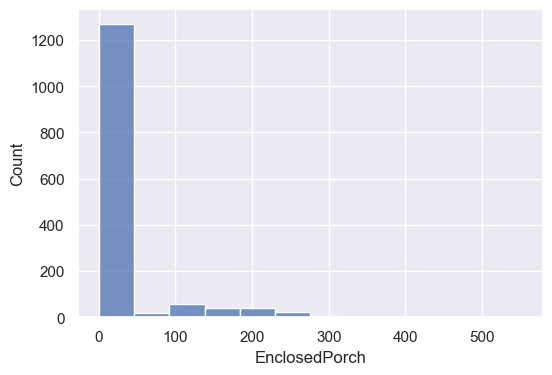

In [210]:
sns.histplot(x='EnclosedPorch',data = ames_train)

<Axes: xlabel='3SsnPorch', ylabel='Count'>

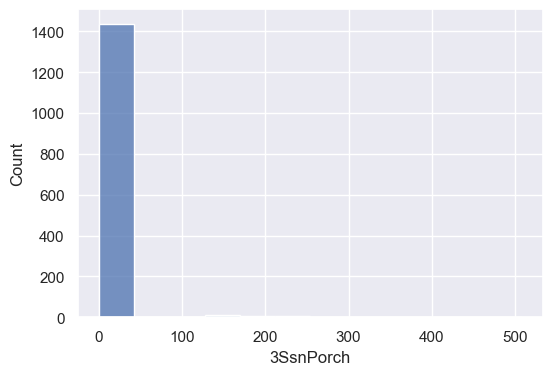

In [211]:
sns.histplot(x='3SsnPorch',data = ames_train)
#ames_train['3SsnPorch'].describe() #it has lot of 0 value, will remove it

<Axes: xlabel='ScreenPorch', ylabel='Count'>

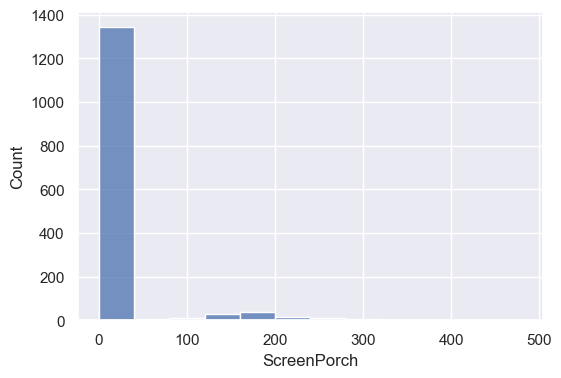

In [212]:
sns.histplot(x='ScreenPorch',data = ames_train)

<Axes: xlabel='PoolArea', ylabel='Count'>

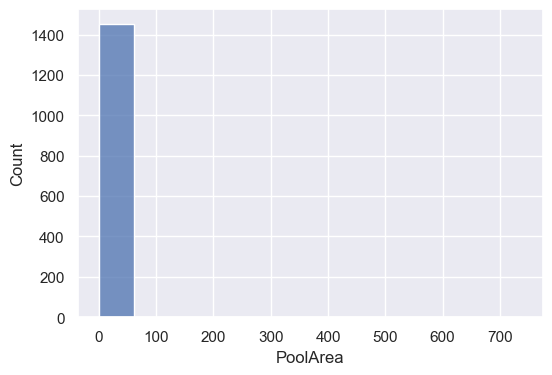

In [213]:
sns.histplot(x='PoolArea',data = ames_train)

In [214]:
ames_train['PoolArea'].describe(include = 'all')

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

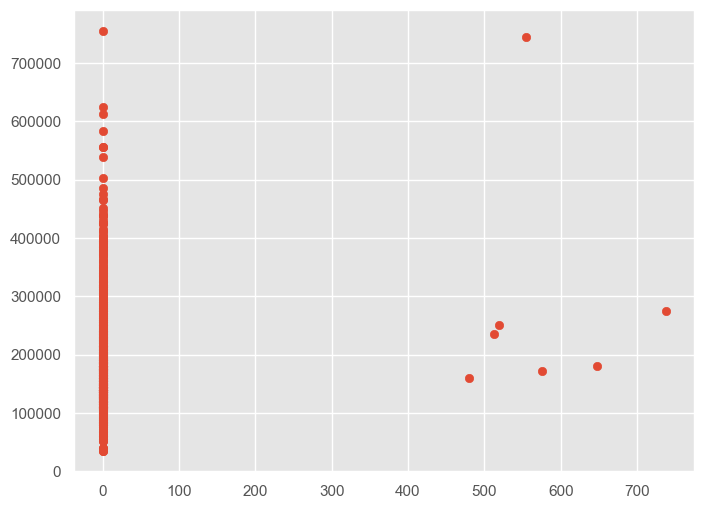

In [366]:
plt.scatter(x = 'PoolArea',y = 'SalePrice', data = ames_train )

In [22]:
ames_train.query('PoolArea > 0').sort_values('SalePrice')
## it means majority of the houses don't have Pool area and the houses with pool are on the expensive side. 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,522,Unf,0,574,1096,GasA,TA,Y,SBrkr,1118,0,0,1118,1,0,1,0,3,1,TA,6,Typ,1,Po,Attchd,1977.0,Fin,1,358,TA,TA,Y,203,0,0,0,0,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,CompShg,HdBoard,HdBoard,BrkFace,99.0,TA,TA,CBlock,TA,TA,No,ALQ,663,LwQ,377,0,1040,GasA,Fa,Y,SBrkr,1309,0,0,1309,1,0,1,1,3,1,Gd,5,Typ,1,Fa,Attchd,1974.0,RFn,2,484,TA,TA,Y,265,0,0,0,0,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,NaN,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,Gd,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,184.0,TA,TA,CBlock,Gd,TA,No,BLQ,790,LwQ,469,133,1392,GasA,TA,Y,SBrkr,1392,1392,0,2784,1,0,3,1,5,1,Gd,12,Typ,2,TA,Attchd,1978.0,RFn,2,564,TA,TA,Y,0,112,0,0,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,SLvl,6,7,1966,1966,Flat,Tar&Grv,Plywood,Plywood,NaN,0.0,Gd,Gd,CBlock,Gd,TA,Av,Unf,0,Unf,0,697,697,GasA,TA,Y,SBrkr,1575,626,0,2201,0,0,2,0,4,1,Gd,8,Typ,1,Gd,Attchd,1966.0,Unf,2,432,Gd,Gd,Y,586,236,0,0,0,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,NaN,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


<Axes: xlabel='PoolQC'>

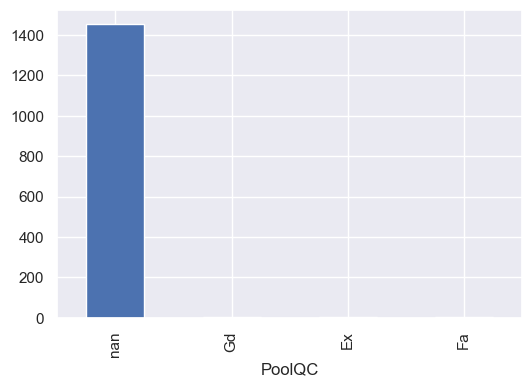

In [216]:
ames_train['PoolQC'].value_counts(dropna = False).plot(kind = 'bar')# will change the Nan to No, as per the data description

<Axes: xlabel='Fence'>

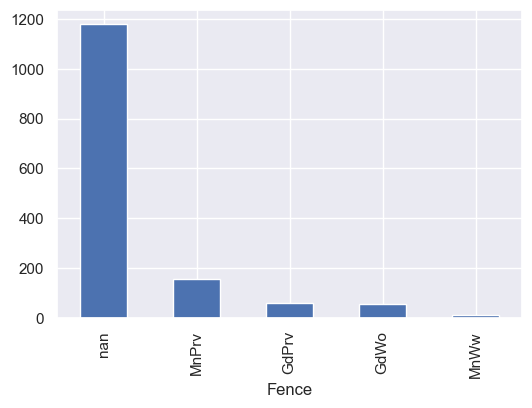

In [217]:
ames_train['Fence'].value_counts(dropna = False).plot(kind = 'bar') # will change the Nan to No, as per the data description

<Axes: xlabel='MoSold'>

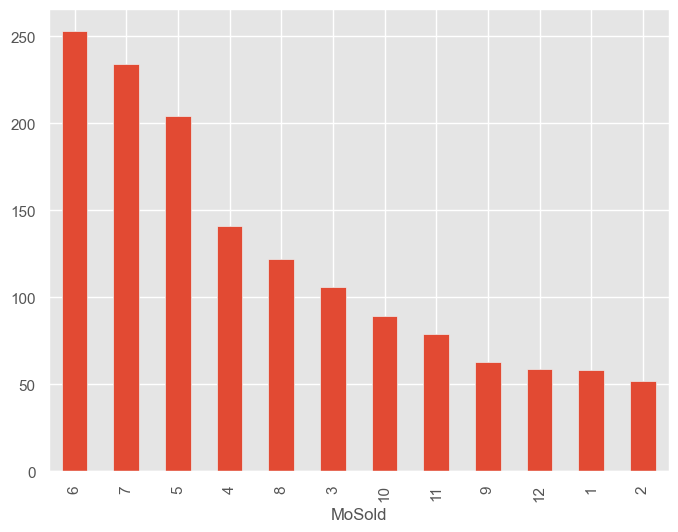

In [373]:
# will change dtype to object
ames_train['MoSold'].value_counts(dropna = False).plot(kind = 'bar')

In [67]:
ames_train['MoSold'] = ames_train['MoSold'].apply(str)
ames_test['MoSold'] = ames_test['MoSold'].apply(str)

<Axes: xlabel='YrSold'>

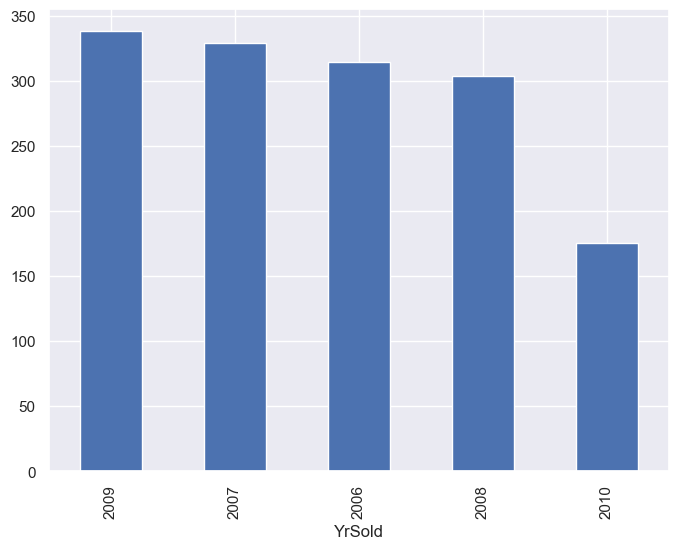

In [16]:
## will change dtype to object as it shows sale for each year from 2006 to 2010
ames_train['YrSold'].value_counts(dropna = False).plot(kind = 'bar')

In [68]:
ames_train['YrSold'] = ames_train['YrSold'].apply(str)
ames_test['YrSold'] = ames_test['YrSold'].apply(str)

<Axes: xlabel='SaleType'>

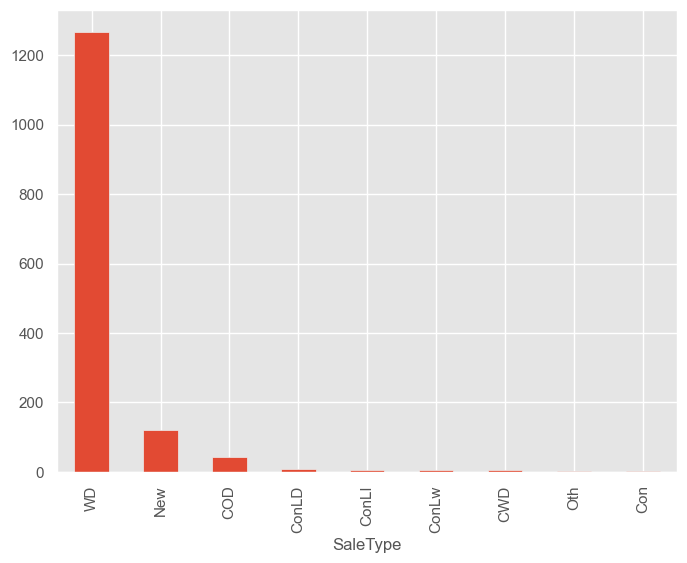

In [377]:
 ames_train['SaleType'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='MiscFeature'>

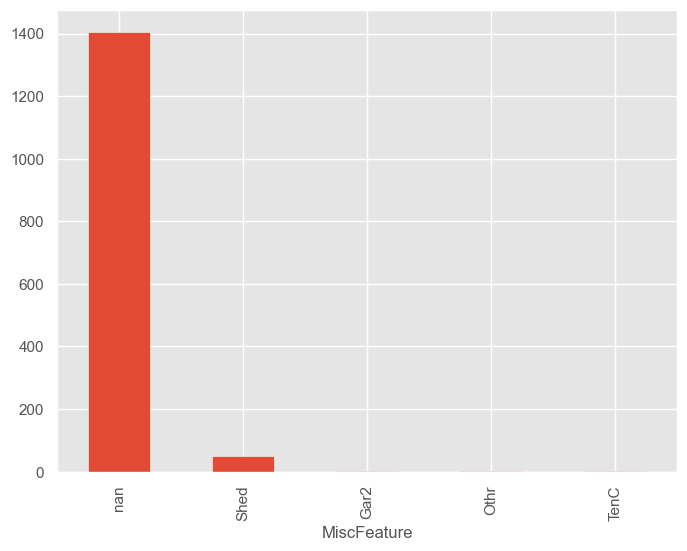

In [378]:
ames_train['MiscFeature'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='SaleCondition'>

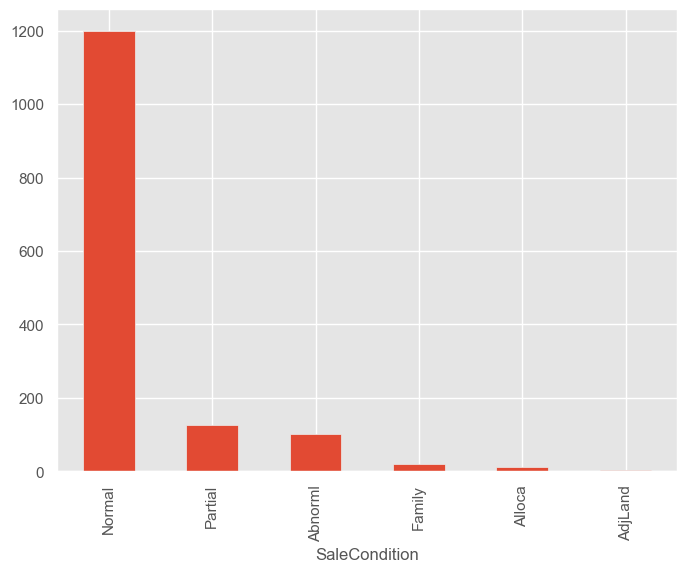

In [379]:
ames_train['SaleCondition'].value_counts(dropna = False).plot(kind = 'bar')

<Axes: xlabel='MiscVal', ylabel='Count'>

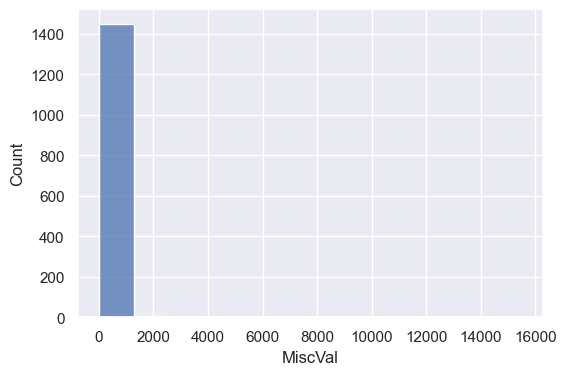

In [225]:
 sns.histplot(x = 'MiscVal',data = ames_train)

<Axes: xlabel='SalePrice', ylabel='Count'>

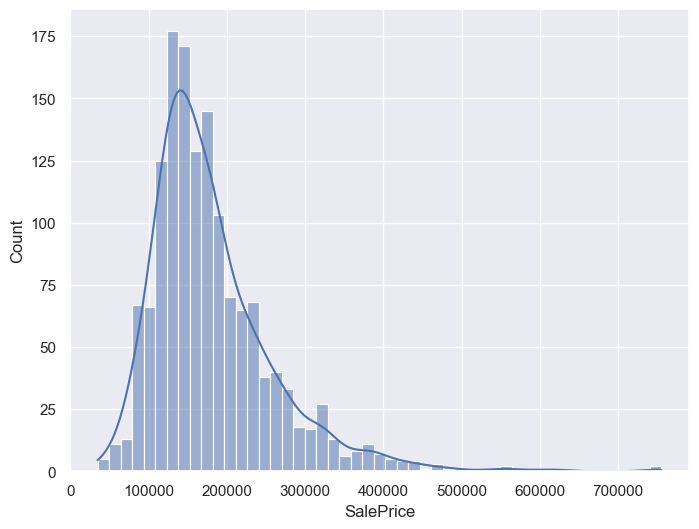

In [69]:
# lets look into the target variable, SalePrice
sns.set(rc={'figure.figsize': (8,6)})
sns.histplot(x = 'SalePrice',data = ames_train, kde = True)

In [70]:
ames_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The target variable has right-skewed distribution, with many outliers on the right side.We see a bunch of features that look positively skewed, similar to SalePrice. We'll want to log transform these, include: LotFrontage, LotArea, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, GrLivAre, GarageArea.

Some features can be considered as count data, and maybe we don't want to transform the )-: BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotalRmsAbvGr, Fireplaces, GarageCars

We see time related features: YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold

We note that MSSubclass should really be orizedlsion, we should also treat MoSold as categorical as the Euclidean distance between them doesn't make sense in this application. Same for YrSold. For YearBuilt, however, the distance is relevant as it implies  the house.house

###  Handling Missing Values

<Axes: >

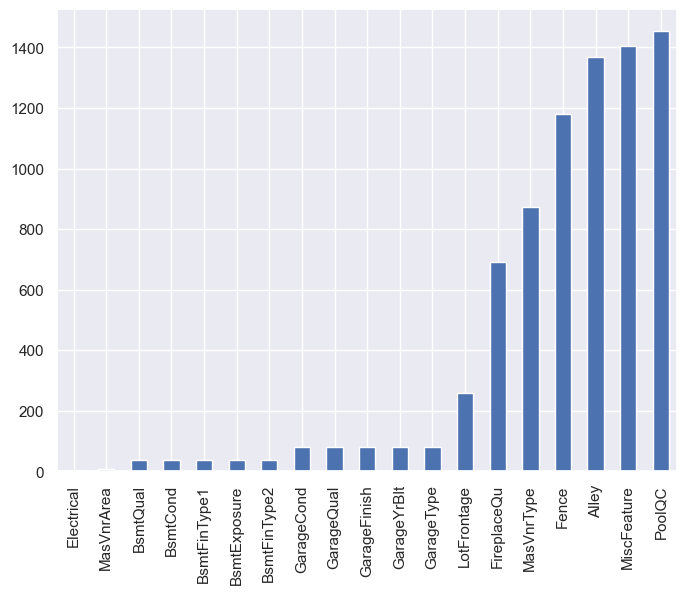

In [71]:
# Checking for missing values present in the dataset.

null_val = ames_train.isna().sum()
null_val = null_val[null_val>0]
null_val.sort_values(inplace = True)
null_val.plot.bar()


'Fence', 'MiscFeature','Alley','PoolQC' are the features with more than 50% Nan values, we will drop them as of now.

In [72]:
#Handling missing values in the follwing columns:- 
# 'FireplaceQu','MasVnrType','LotFrontage','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','BsmtFinType2', 'BsmtExposure', 'BsmtFinType1',
#'BsmtQual', 'BsmtCond','MasVnrArea','Electrical (since GarageQual n GarageCond are similar in nature will remove one of them)
ames_train['LotFrontage'] = ames_train['LotFrontage'].fillna(ames_train['LotFrontage'].mean())
ames_test['LotFrontage'] = ames_test['LotFrontage'].fillna(ames_test['LotFrontage'].mean())
ames_train['LotFrontage'].isnull().sum()

0

In [22]:
ames_train.FireplaceQu.value_counts(dropna = False)

FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: count, dtype: int64

In [73]:
ames_train['FireplaceQu'] = ames_train['FireplaceQu'].fillna('No')
ames_test['FireplaceQu'] = ames_test['FireplaceQu'].fillna('No')

In [74]:
ames_train['MasVnrType'] = ames_train['MasVnrType'].fillna('No')
ames_test['MasVnrType'] = ames_test['MasVnrType'].fillna('No')

In [25]:
ames_train.GarageType.value_counts(dropna = False)

GarageType
Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [75]:
 ames_train['GarageType'] = ames_train['GarageType'].fillna('No')
 ames_test['GarageType'] = ames_test['GarageType'].fillna('No')

In [76]:
ames_train.GarageYrBlt.isnull().sum()

81

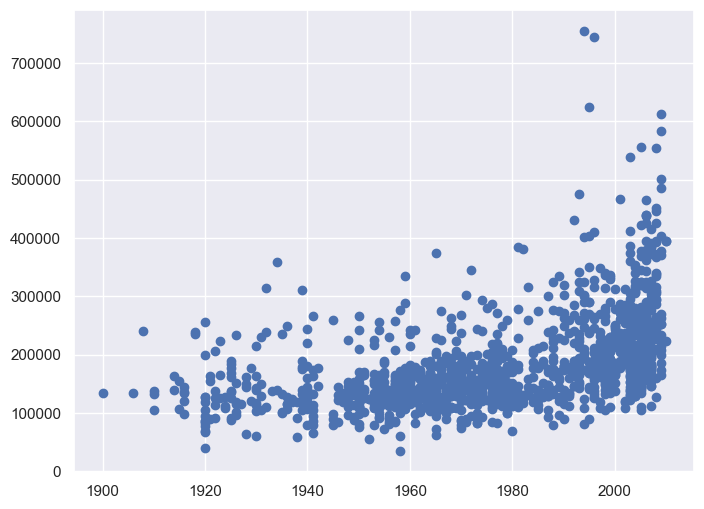

In [77]:
plt.scatter(x = 'GarageYrBlt', y = 'SalePrice', data = ames_train )

In [78]:
ames_train['GarageYrBlt'].corr(ames_train['YearBuilt'])
# GarageyrBlt and YearBuilt are highly corelated,will remove GarageYrBlt for multicolinearity.

0.825667484174342

In [79]:
ames_train['GarageCond'].value_counts(dropna = False)
# will remove GarageCond as it is similar to GarageQual

GarageCond
TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: count, dtype: int64

In [31]:
ames_train['GarageFinish'].value_counts(dropna = False)

GarageFinish
Unf    605
RFn    422
Fin    352
NaN     81
Name: count, dtype: int64

In [80]:
ames_train['GarageFinish'] = ames_train['GarageFinish'].fillna('No')
ames_test['GarageFinish'] = ames_test['GarageFinish'].fillna('No')

In [33]:
ames_train['GarageQual'].value_counts(dropna = False)

GarageQual
TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: count, dtype: int64

In [81]:
ames_train['GarageQual'] = ames_train['GarageQual'].fillna('No')
ames_test['GarageQual'] = ames_test['GarageQual'].fillna('No')

In [35]:
ames_train['BsmtFinType2'].value_counts(dropna = False)

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [82]:
ames_train['BsmtFinType2'] = ames_train['BsmtFinType2'].fillna('No')
ames_test['BsmtFinType2'] = ames_test['BsmtFinType2'].fillna('No')

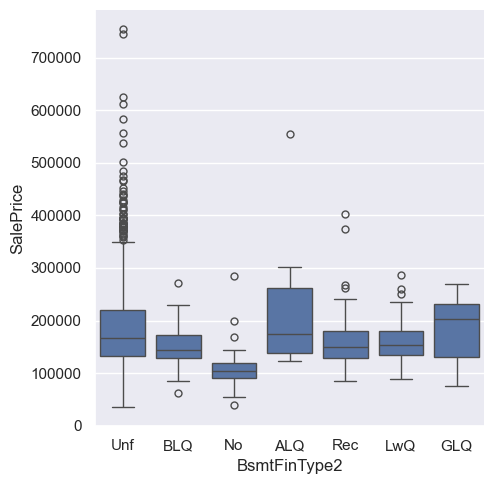

In [37]:
sns.catplot(data = ames_train, x = 'BsmtFinType2',y = 'SalePrice', kind = 'box' )
# as it has very less variance across the board, will remove it as of now.

In [38]:
ames_train['BsmtExposure'].value_counts(dropna = False)

BsmtExposure
No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: count, dtype: int64

In [83]:
ames_train['BsmtExposure'] = ames_train['BsmtExposure'].fillna('No')
ames_test['BsmtExposure'] = ames_test['BsmtExposure'].fillna('No')

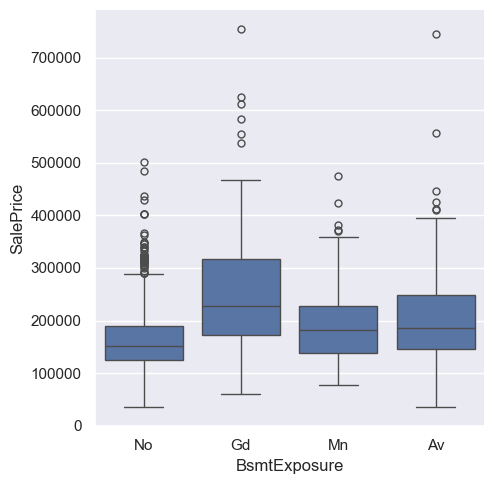

In [40]:
sns.catplot(data = ames_train, x = 'BsmtExposure',y = 'SalePrice', kind = 'box' )

In [41]:
ames_train['BsmtFinType1'].value_counts(dropna = False)

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: count, dtype: int64

In [84]:
ames_train['BsmtFinType1'] = ames_train['BsmtFinType1'].fillna('Unf')
ames_test['BsmtFinType1'] = ames_test['BsmtFinType1'].fillna('Unf')

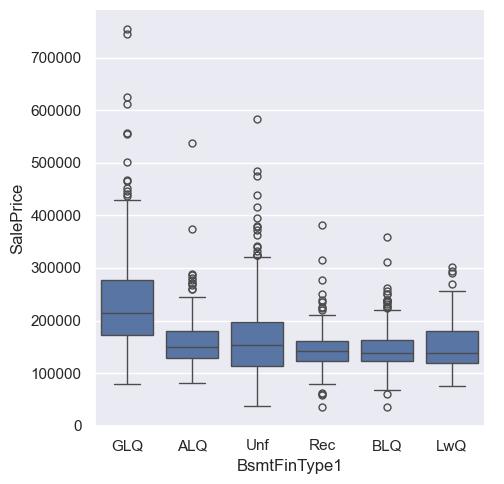

In [43]:
sns.catplot(data = ames_train, x = 'BsmtFinType1',y = 'SalePrice', kind = 'box' )

In [44]:
ames_train['BsmtQual'].value_counts(dropna = False)

BsmtQual
TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: count, dtype: int64

In [85]:
ames_train['BsmtQual'] = ames_train['BsmtQual'].fillna('No')
ames_test['BsmtQual'] = ames_test['BsmtQual'].fillna('No')

In [46]:
ames_train['BsmtCond'].value_counts(dropna = False)

BsmtCond
TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: count, dtype: int64

In [86]:
ames_train['BsmtCond'] = ames_train['BsmtCond'].fillna('No')
ames_test['BsmtCond'] = ames_test['BsmtCond'].fillna('No')

In [87]:
# MasVnrArea has few Nan values will replace it with 0, as it means there is no masonry vaneer construction in those houses.
ames_train['MasVnrArea'] = ames_train['MasVnrArea'].fillna(0)
ames_test['MasVnrArea'] = ames_test['MasVnrArea'].fillna(0)

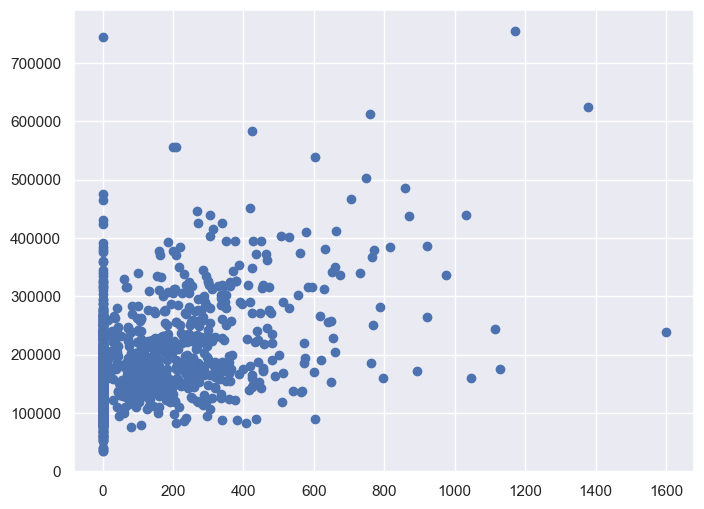

In [49]:
plt.scatter(x = 'MasVnrArea', y = 'SalePrice', data = ames_train )

In [50]:
ames_train['Electrical'].value_counts(dropna = False)

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: count, dtype: int64

In [88]:
ames_train['Electrical'] = ames_train['Electrical'].fillna('SBrkr')
ames_test['Electrical'] = ames_test['Electrical'].fillna('SBrkr')

In [89]:
ames_train = ames_train.drop(columns = ['Fence', 'MiscFeature','Alley','PoolQC','GarageYrBlt','GarageCond','BsmtFinType2'])
ames_test = ames_test.drop(columns = ['Fence', 'MiscFeature','Alley','PoolQC','GarageYrBlt','GarageCond','BsmtFinType2'])

### Bivariate Analysis 
Correlation 

In [90]:
numeric_features = ames_train.select_dtypes(include = [np.number])
numeric_features.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')

In [91]:
correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending = False))

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


<Axes: title={'center': 'Correlation of Numeric features with SalePrice'}>

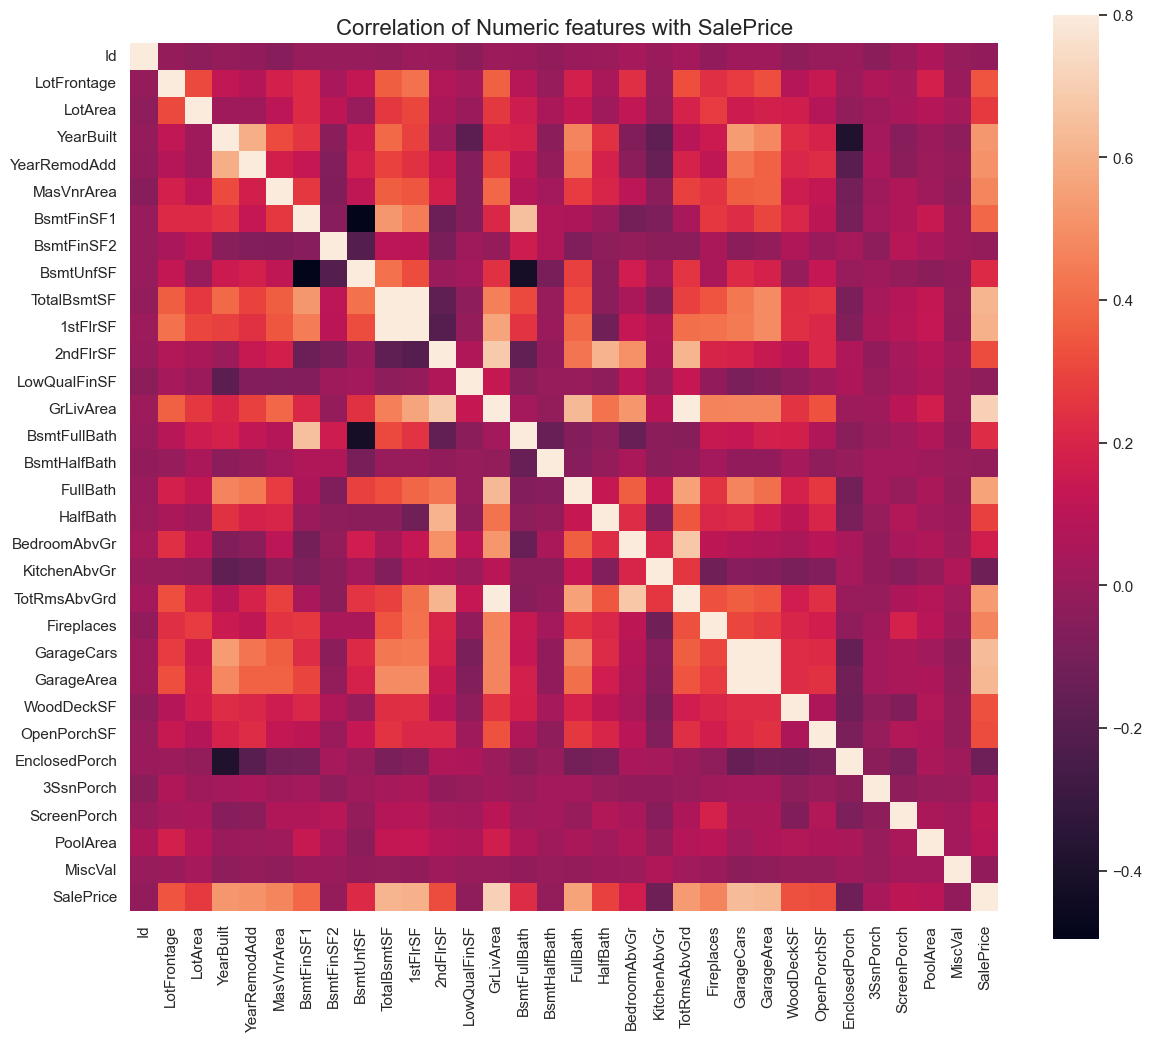

In [92]:
f, ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric features with SalePrice',y =1,size=16)

sns.heatmap(correlation,square = True, vmax = 0.8)

In [93]:
# choosing 10 highest corr()
k = 11
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)

Index(['SalePrice', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea'],
      dtype='object')


<Axes: >

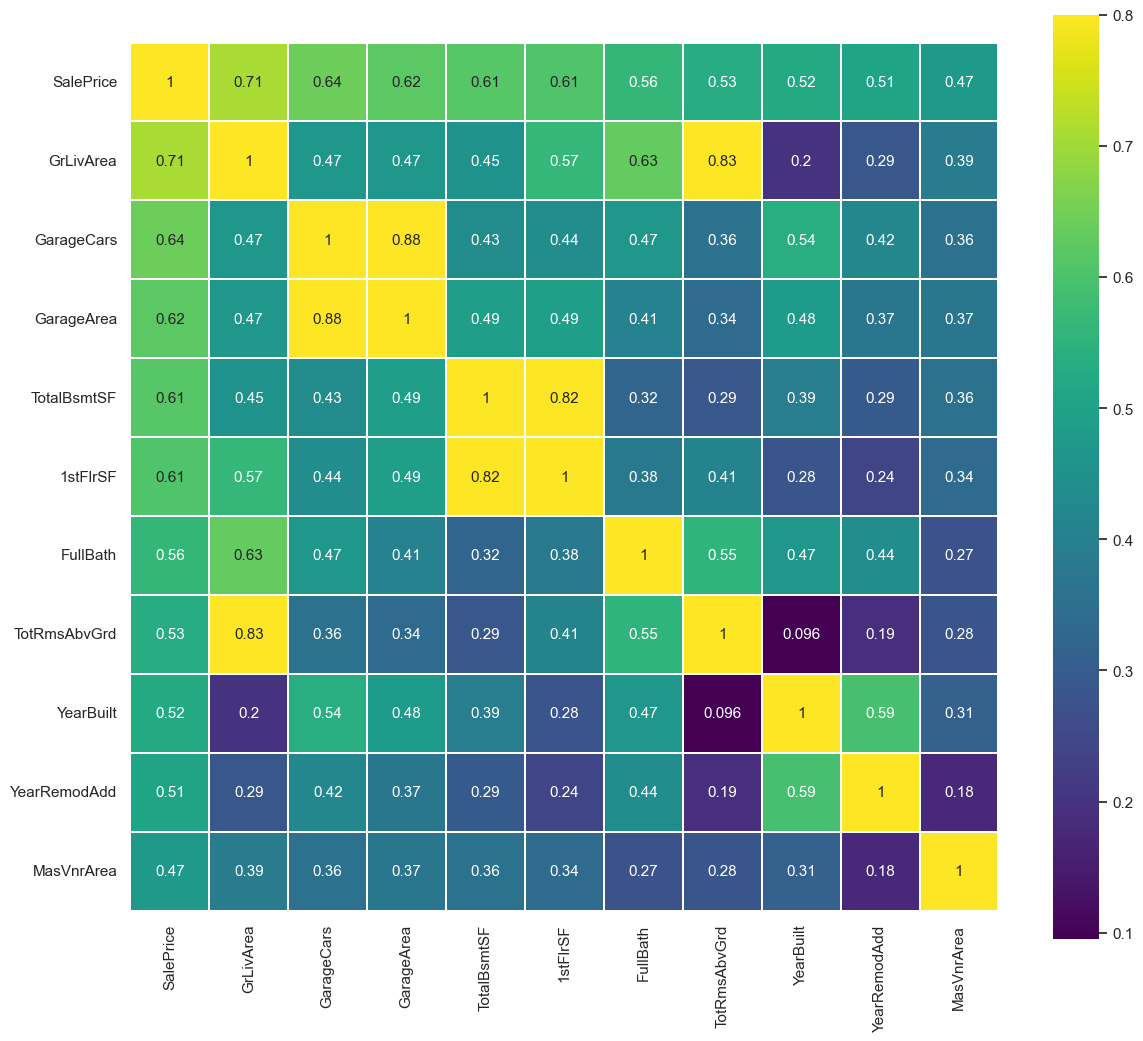

In [58]:
cm = np.corrcoef(ames_train[cols].values.T)

f, ax = plt.subplots(figsize = (14,12))

sns.heatmap(cm,vmax = 0.8,linewidths= 0.01,square = True, annot = True,cmap = 'viridis',
           linecolor = 'white', xticklabels = cols.values, annot_kws = {'size':11},yticklabels = cols.values)

There are multicollinearity in Garagecars, GarageArea, TotRmsAbvGrd, GrLivArea,TotalBsmtSF and 1stFlrSF, will remove some of them later.

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

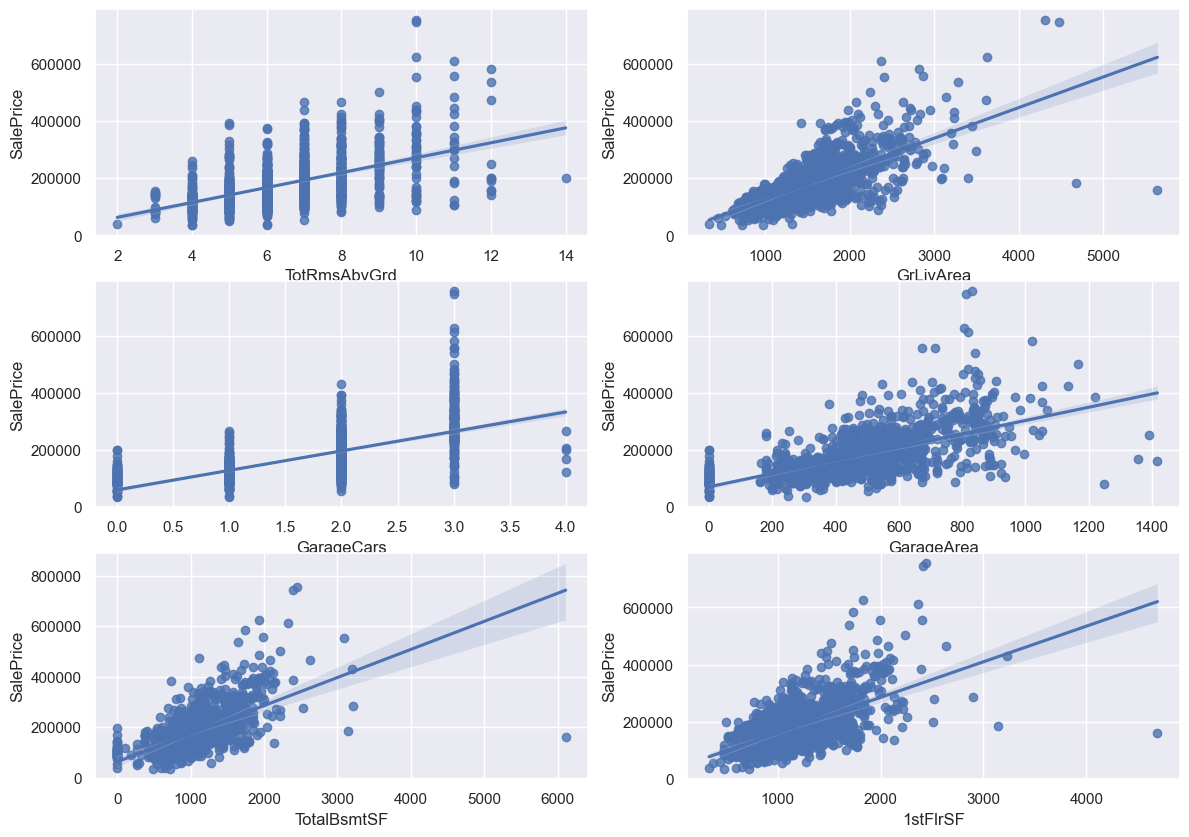

In [94]:
#scatter plots between the most correlated variables
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows = 3, ncols =2, figsize=(14,10))
sns.regplot(x = 'TotRmsAbvGrd',y= 'SalePrice',data = ames_train ,scatter = True, fit_reg = True, ax = ax1)
sns.regplot(x = 'GrLivArea',y= 'SalePrice',data = ames_train,scatter = True, fit_reg = True, ax = ax2)
sns.regplot(x = 'GarageCars',y= 'SalePrice',data = ames_train,scatter = True, fit_reg = True, ax = ax3)
sns.regplot(x = 'GarageArea',y= 'SalePrice',data = ames_train,scatter = True, fit_reg = True, ax = ax4)
sns.regplot(x = 'TotalBsmtSF',y= 'SalePrice',data = ames_train,scatter = True, fit_reg = True, ax = ax5)
sns.regplot(x = '1stFlrSF',y= 'SalePrice',data = ames_train,scatter = True, fit_reg = True, ax = ax6)

<Axes: xlabel='SalePrice'>

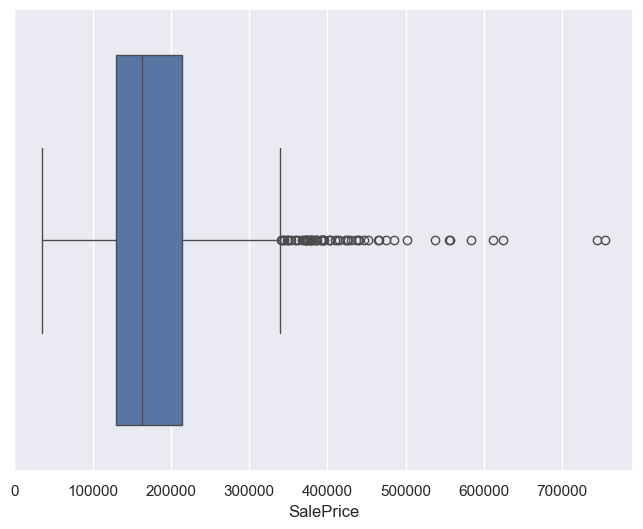

In [97]:
# Outliers present in target variable, will do log tranformation on it.

sns.boxplot(x=ames_train["SalePrice"])

In [98]:
ames_train.shape

(1460, 74)

### Data Cleaning

In [99]:
'''Removing unnecessary features on the below grounds:
1. Multicolinearity
   
GarageCars <=> GarageArea, GrLivArea <=> TotRmsAbvGrd, TotalBsmtSF <=> 1stFlrSF, FullBath <=> GrLivArea 

2. Features with poor correlation with the target feature:BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
EnclosedPorch   -0.128578
KitchenAbvGr    -0.
13907tche
A4. Removing Features which contain one data-heavy class:
   Condition2 , Uti '''bvGr  


SyntaxError: incomplete input (1591675132.py, line 1)

In [100]:
df = ames_train.drop(['GarageArea','GrLivArea','TotalBsmtSF','BsmtFinSF2','BsmtHalfBath','MiscVal','Id','LowQualFinSF','EnclosedPorch','KitchenAbvGr','Utilities','Condition2'],axis = 1)
df_test = ames_test.drop(['GarageArea','GrLivArea','TotalBsmtSF','BsmtFinSF2','BsmtHalfBath','MiscVal','Id','LowQualFinSF','EnclosedPorch','KitchenAbvGr','Utilities','Condition2'],axis = 1)

In [101]:
df.shape

(1460, 62)

In [102]:
df_num = df.select_dtypes(include = [np.number])
df_num.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'SalePrice'],
      dtype='object')

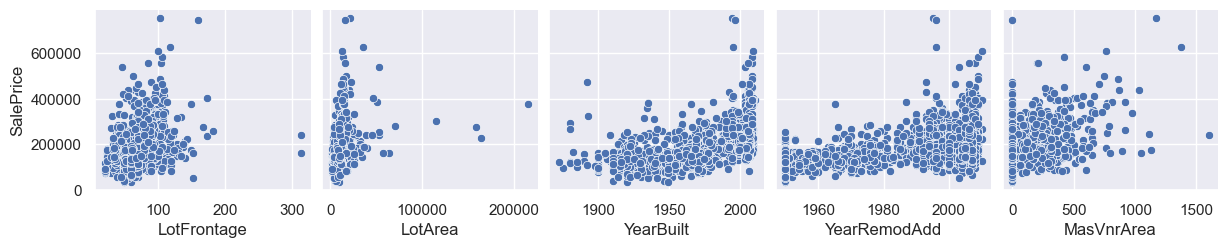

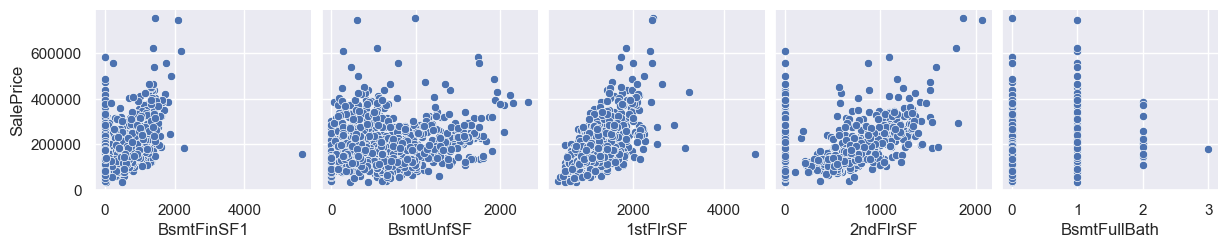

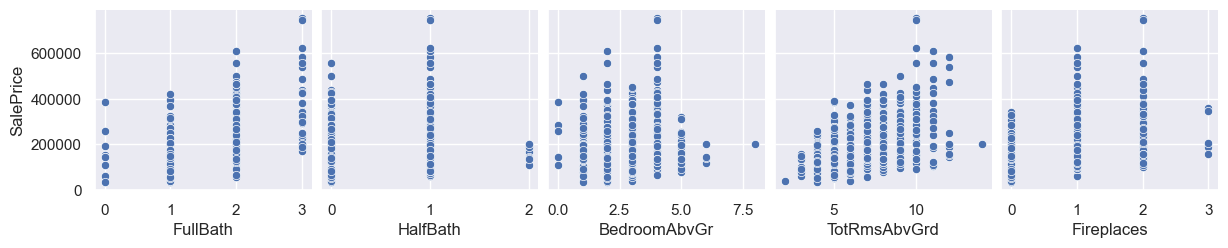

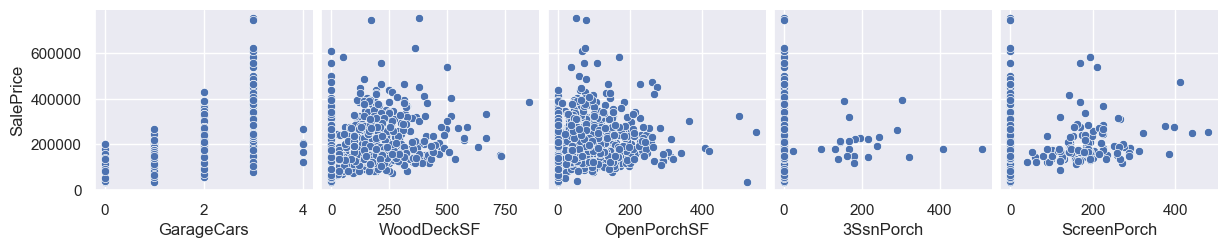

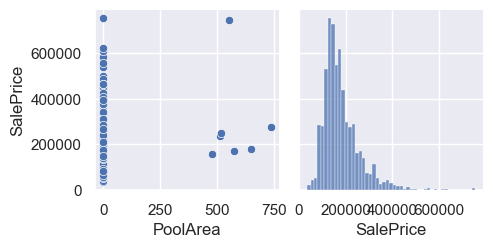

In [103]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data = df_num, x_vars = df_num.columns[i:i+5],
                y_vars = ['SalePrice'])

In [104]:
df_cat = df.select_dtypes(include = ['O'])
df_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [105]:
# Removing the outliers row-wise

df.query('OverallQual== 10 & SalePrice <200000 ')
#523,1298

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [106]:
df_num.query('YearBuilt < 1900 & SalePrice > 250000')
#304,583,747,1453

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,SalePrice
185,90.0,22950,1892,1993,0.0,0,1107,1518,1518,0,2,1,4,12,2,3,0,260,0,410,0,475000
304,87.0,18386,1880,2002,0.0,0,1470,1675,1818,0,3,0,3,10,1,3,302,0,0,0,0,295000
583,75.0,13500,1893,2000,0.0,0,1237,1521,1254,0,3,1,3,9,1,2,105,502,0,0,0,325000
747,65.0,11700,1880,2003,0.0,0,1240,1320,1320,0,1,1,4,8,1,4,181,0,0,0,0,265979


In [107]:
df_num.query('YearBuilt > 2005 & SalePrice < 100000')

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,SalePrice
1453,90.0,17217,2006,2006,0.0,0,1140,1140,0,0,1,0,3,6,0,0,36,56,0,0,0,84500


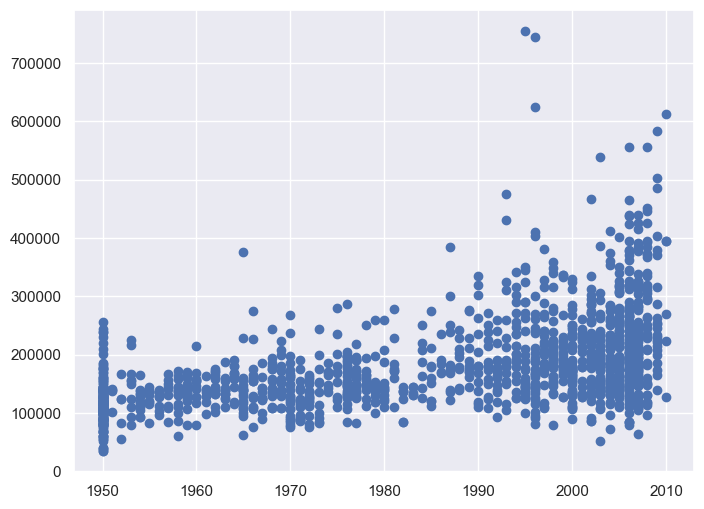

In [108]:
plt.scatter(x = 'YearRemodAdd', y = 'SalePrice', data = df_num )

In [109]:
df_num.query('YearRemodAdd < 1970 & SalePrice > 300000')
# 313

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,SalePrice
313,150.0,215245,1965,1965,0.0,1236,80,2036,0,2,2,0,3,8,2,2,0,0,0,0,0,375000


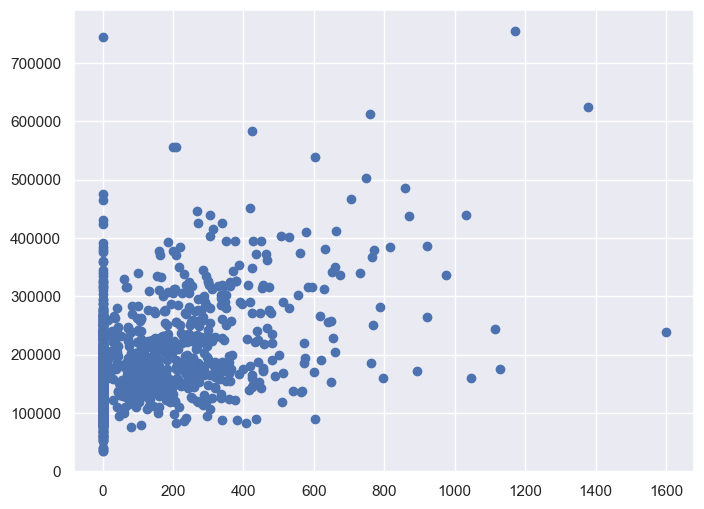

In [110]:
plt.scatter(x = 'MasVnrArea', y = 'SalePrice', data = df_num )

In [111]:
df_num.query('MasVnrArea > 1500')
#297

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,SalePrice
297,66.0,7399,1997,1998,1600.0,649,326,975,975,0,2,1,3,7,1,2,0,10,0,198,0,239000


In [112]:
df_num.query('BsmtFinSF1 > 4000')
#1298

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,SalePrice
1298,313.0,63887,2008,2008,796.0,5644,466,4692,950,2,2,1,3,12,3,2,214,292,0,0,480,160000


In [113]:
df_num.query('TotRmsAbvGrd > 12')
#635

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,SalePrice
635,60.0,10896,1914,1995,0.0,256,1184,1440,1440,0,2,0,8,14,0,0,0,110,0,0,0,200000


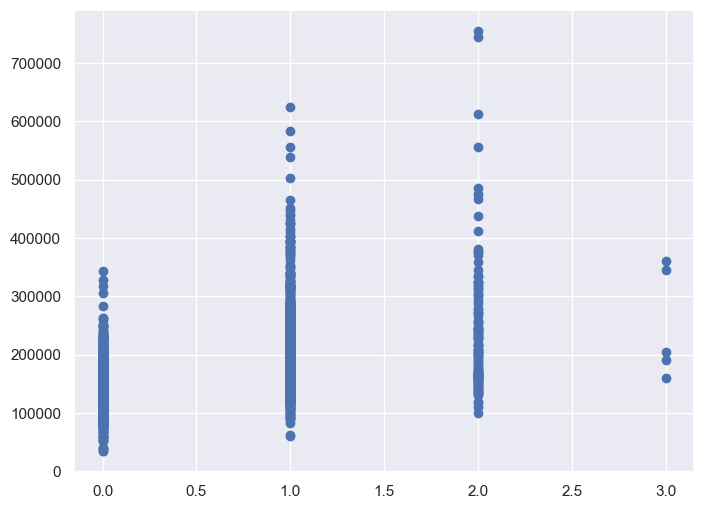

In [114]:
plt.scatter(x = 'Fireplaces', y = 'SalePrice', data = df_num )

In [115]:
df_num.query('Fireplaces == 3 & SalePrice < 300000 ')
#166,605,1298

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,SalePrice
166,70.049958,10708,1955,1993,0.0,379,470,1867,0,1,1,0,2,7,3,1,476,0,0,142,0,190000
605,85.000000,13600,1965,1990,176.0,454,314,1186,800,0,2,1,3,7,3,2,0,42,0,189,0,205000
1298,313.000000,63887,2008,2008,796.0,5644,466,4692,950,2,2,1,3,12,3,2,214,292,0,0,480,160000


In [116]:
# Dropping below the 13 rows which seems outliers.

values = [10611,1190,1298,166,605,635,297,313,304,583,747,1453,523]
df = df[df.index.isin(values) == False]


In [117]:
df.shape

(1448, 62)

In [118]:
df_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [119]:
df_cat['MSSubClass'].unique()

array(['60', '20', '70', '50', '190', '45', '90', '120', '30', '85', '80',
       '160', '75', '180', '40'], dtype=object)

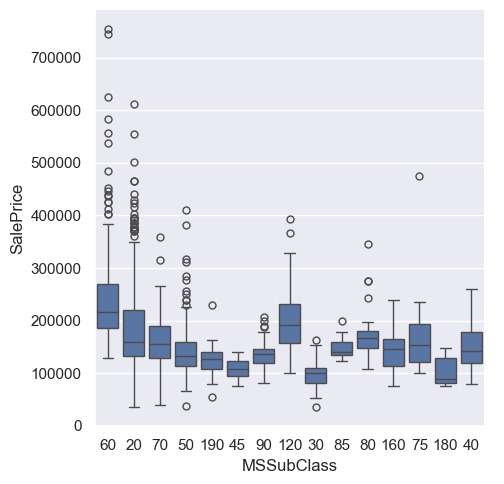

In [120]:
sns.catplot(data = df, x = 'MSSubClass',y = 'SalePrice', kind = 'box')

In [121]:
df_cat['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

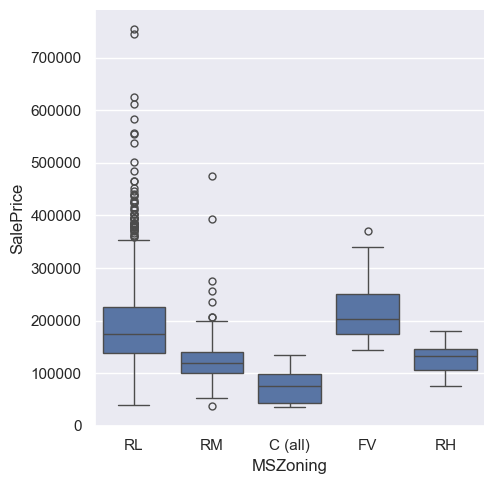

In [122]:
sns.catplot(data = df, x = 'MSZoning',y = 'SalePrice', kind = 'box')

In [130]:
df_cat['Street'].value_counts() 

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

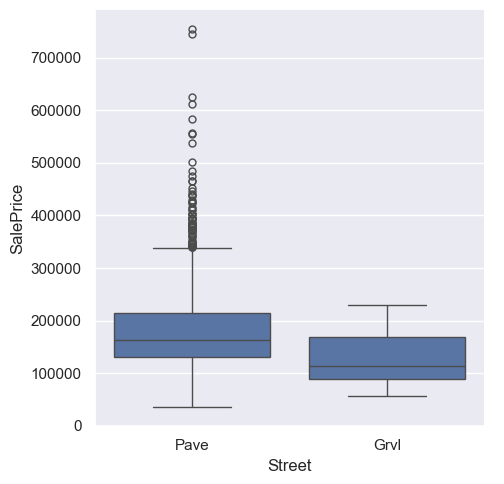

In [131]:
sns.catplot(data = df, x = 'Street',y = 'SalePrice', kind = 'box')

In [132]:
df_cat['LotShape'].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

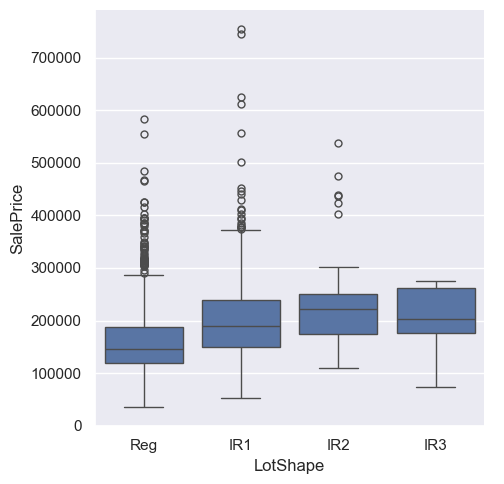

In [133]:
sns.catplot(data = df, x = 'LotShape',y = 'SalePrice', kind = 'box')

In [134]:
df_cat['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

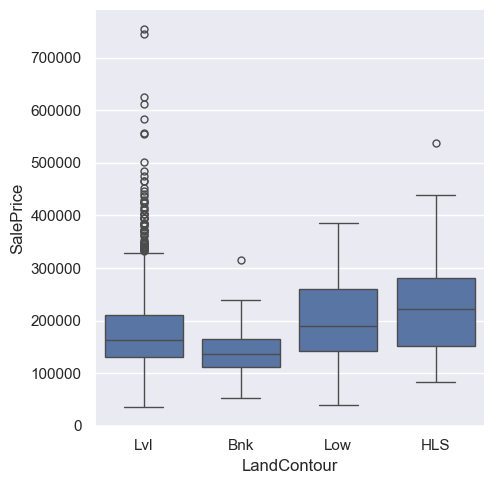

In [135]:
sns.catplot(data = df, x = 'LandContour',y = 'SalePrice', kind = 'box')

In [137]:
df_cat['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

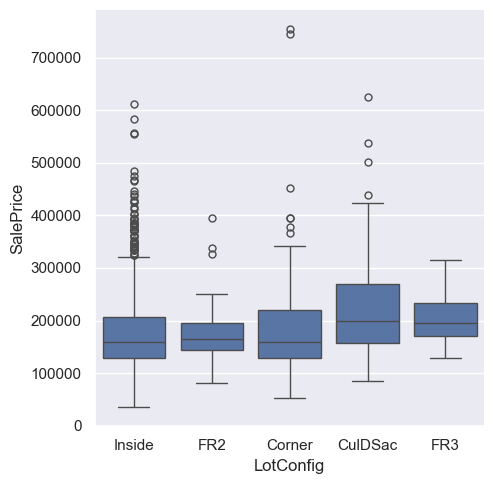

In [138]:
sns.catplot(data = df, x = 'LotConfig',y = 'SalePrice', kind = 'box')

In [139]:
df_cat['LandSlope'].value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

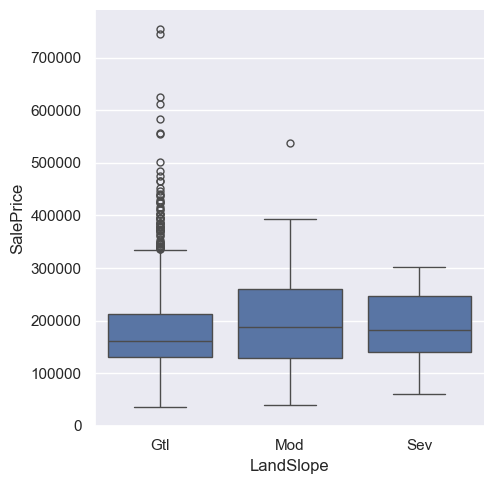

In [140]:
sns.catplot(data = df, x = 'LandSlope',y = 'SalePrice', kind = 'box')

In [123]:
df_cat['Neighborhood'].value_counts()
# it seems majority of the people lives in NAmes,CollgCr,OldTown,Edwards and Somerst, could be due to presence of good schools and colleges,
# affordable housing ,healthcare ,good neighborhood, or less crime rate etc etc.    

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [126]:
df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending = False)
# NoRidge,NridgHt and StoneBr are the most expensive neighborhood.

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Veenker    238772.727273
Timber     238659.540541
Somerst    225219.600000
ClearCr    213401.185185
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    157547.574468
NAmes      145583.004464
NPkVill    142694.444444
SWISU      140199.333333
Blueste    137500.000000
Sawyer     136793.135135
Edwards    127318.571429
BrkSide    124834.051724
OldTown    123668.000000
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64

In [127]:
# We’d like to have a better sense of which feature influences SalePrice more than others. 
# What we’ll do is run one-way ANOVA tests for each categorical feature againt SalePrice. 
# This will give us both the F statistic and p-values for each feature. 
# In order for ANOVA to work, we have to take care of missing values first

df_cat.isnull().sum().sum()

0

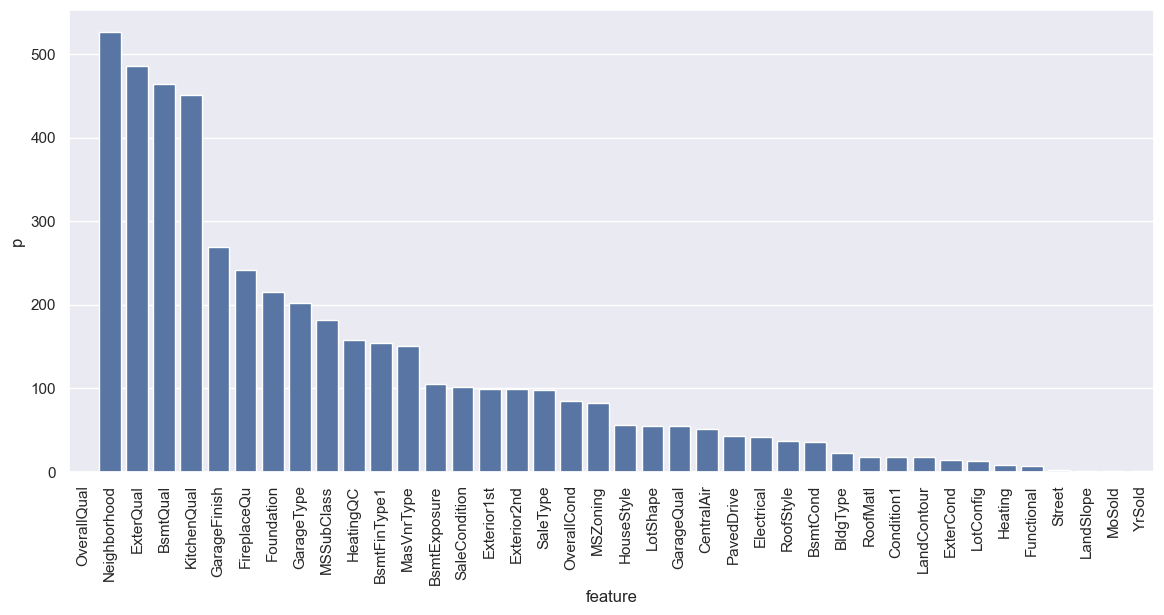

In [130]:
# One-way ANOVA 

anova = {'feature':[], 'f':[], 'p':[]}
for cat in df_cat:
    group_prices = []
    for group in df[cat].unique():
        group_prices.append(df[df[cat] == group]['SalePrice'].values)
    f, p = stats.f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p', inplace=True)

# Plot
plt.figure(figsize=(14,6))
sns.barplot(x = anova.feature,y = np.log(1./anova['p']))
plt.xticks(rotation=90)
plt.show()

### Data Preparation for Modelling

In [131]:
df_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [132]:
ohe_col = ['MSSubClass','MSZoning','Street','LotConfig','Neighborhood','Condition1',
           'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
           'Foundation','Heating','Electrical', 'GarageType','MoSold', 'YrSold','SaleType', 'SaleCondition']
ohe_col

['MSSubClass',
 'MSZoning',
 'Street',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'GarageType',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [133]:
#since 'GarageQual' and 'GarageCond' are providing similar info, hence removing GarageCond

ord_col = ['LotShape','LandContour',
            'LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'CentralAir','KitchenQual', 'Functional','FireplaceQu',
       'GarageFinish','GarageQual','PavedDrive']

In [134]:
df_num = df_num.drop('SalePrice',axis = 1)

In [135]:
df_num.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch',
       'PoolArea'],
      dtype='object')

In [136]:
#log transformation of the target var.
df['SalePrice'] = np.log1p(df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

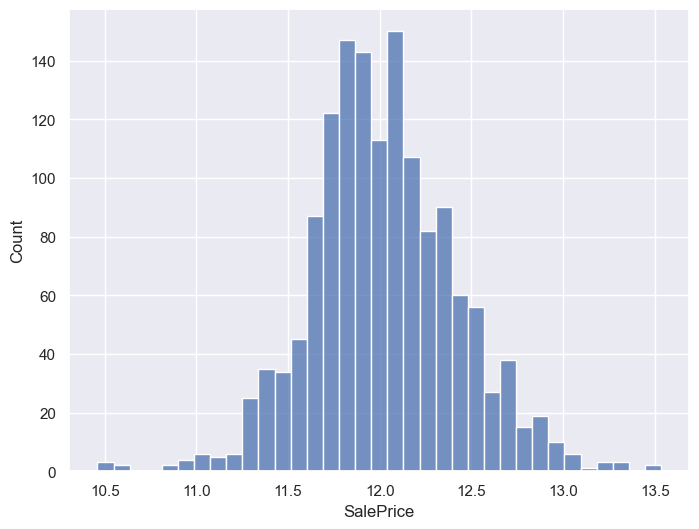

In [138]:
sns.histplot(x = 'SalePrice',data = df)

In [139]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer,ColumnTransformer

In [140]:
num_pipeline = Pipeline(steps = [
    ('impute',SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
     ])

In [141]:
ord_pipeline = Pipeline(steps = [
    ('impute',SimpleImputer(strategy = 'most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown = 'use_encoded_value',unknown_value = -1))
     ])

In [142]:
ohe_pipeline = Pipeline(steps = [
    ('impute',SimpleImputer(strategy = 'most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))
     ])

In [143]:
column_transform = ColumnTransformer(transformers=[
    ('num_pipe', num_pipeline, df_num.columns),
    ('ord_pipe', ord_pipeline, ord_col),
    ('ohe_pipe', ohe_pipeline, ohe_col)],
     remainder = 'passthrough',
     n_jobs = -1)
    

In [144]:
pipeline = Pipeline(steps = [
    ('preprocessing',column_transform)
    ])

In [145]:
df_num.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch',
       'PoolArea'],
      dtype='object')

In [148]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']
print(X.shape)
print(y.shape)

(1448, 61)
(1448,)


In [149]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,150,GasA,Ex,Y,SBrkr,856,854,1,2,1,3,Gd,8,Typ,0,No,Attchd,RFn,2,TA,Y,0,61,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,No,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,284,GasA,Ex,Y,SBrkr,1262,0,0,2,0,3,TA,6,Typ,1,TA,Attchd,RFn,2,TA,Y,298,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,434,GasA,Ex,Y,SBrkr,920,866,1,2,1,3,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,Y,0,42,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,No,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,540,GasA,Gd,Y,SBrkr,961,756,1,1,0,3,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,Y,0,35,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,490,GasA,Ex,Y,SBrkr,1145,1053,1,2,1,4,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,Y,192,84,0,0,0,12,2008,WD,Normal


In [150]:
X_preprocessed = pipeline.fit_transform(X)

In [151]:
X_preprocessed.shape

(1448, 218)

In [152]:
from sklearn.model_selection  import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from math import sqrt


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

In [154]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1158, 218)
(1158,)
(290, 218)
(290,)


In [156]:
lr = LinearRegression()

In [157]:
lr.fit(X_train, y_train)

LinearRegression()

In [158]:
y_pred = lr.predict(X_test)

In [164]:
mean_squared_error(y_test,y_pred)

1.2990613889707184e+17

In [165]:
import statsmodels.api as sm

In [166]:
result = sm.OLS(y_train, X_train).fit()

In [167]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     80.23
Date:                Sat, 24 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:16:48   Log-Likelihood:                 1080.1
No. Observations:                1158   AIC:                            -1778.
Df Residuals:                     967   BIC:                            -812.7
Df Model:                         190                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0140      0.005      3.041      0.0

In [168]:
be_x = X_train.copy()
be_x

array([[-1.7995939 , -0.83760563,  1.08729775, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.0138403 , -0.1825585 ,  0.45315598, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.0138403 ,  0.13849561, -1.41589346, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.44039298,  0.04199799,  1.1874254 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77400804,  0.01092044,  0.48653186, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.44039298, -0.09053508,  1.25417716, ...,  0.        ,
         0.        ,  1.        ]])

#### Backward Elimination of Features with respect to P values.

In [169]:
p_value_threshold = 0.05

def backward_elimination(be_x, p_value_threshold):
    model = sm.OLS(y_train, be_x).fit()
    for i in range(0,len(be_x[0])):
        p_values = list(model.pvalues)
        max_p = max(p_values)
        excluded_feature = p_values.index(max_p)
        if max_p > p_value_threshold:
            be_x = np.delete(be_x ,excluded_feature,axis = 1)
            model = sm.OLS(y_train, be_x).fit()
    print(model.summary())
    return be_x

In [170]:
final_model = backward_elimination(X_train, p_value_threshold)
# It is visible that the backward_elimination functions successfully removed features with pvalue greater than 0.05. 
# hence we are left with 141 significant features from 217 features intruduced in the model initially.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     122.5
Date:                Sat, 24 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:25:36   Log-Likelihood:                 1032.3
No. Observations:                1158   AIC:                            -1819.
Df Residuals:                    1035   BIC:                            -1197.
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0147      0.004      3.313      0.0

#### Variance Inflation Factor for removing multicollinearity from the significant variavbles

In [171]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
''' since I am not able to use the 140 features from above, as they don't have feature names/columns,
I used num features used previously for calculating VIF below. 
Please let me know how can I use these 140 significant features for VIF calculation.'''

In [172]:
df_num

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea
0,65.0,8450,2003,2003,196.0,706,150,856,854,1,2,1,3,8,0,2,0,61,0,0,0
1,80.0,9600,1976,1976,0.0,978,284,1262,0,0,2,0,3,6,1,2,298,0,0,0,0
2,68.0,11250,2001,2002,162.0,486,434,920,866,1,2,1,3,6,1,2,0,42,0,0,0
3,60.0,9550,1915,1970,0.0,216,540,961,756,1,1,0,3,7,1,3,0,35,0,0,0
4,84.0,14260,2000,2000,350.0,655,490,1145,1053,1,2,1,4,9,1,3,192,84,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,953,953,694,0,2,1,3,7,1,2,0,40,0,0,0
1456,85.0,13175,1978,1988,119.0,790,589,2073,0,1,2,0,3,7,2,2,349,0,0,0,0
1457,66.0,9042,1941,2006,0.0,275,877,1188,1152,0,2,0,4,9,2,1,0,60,0,0,0
1458,68.0,9717,1950,1996,0.0,49,0,1078,0,1,1,0,2,5,0,1,366,0,0,0,0


In [173]:
vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(df_num, i) for i in range(df_num.shape[1])]
vif_data["Features"] = df_num.columns


In [174]:
vif_data.round(2)

,VIF,Features
0,15.40,LotFrontage
1,2.57,LotArea
2,9161.12,YearBuilt
3,8995.15,YearRemodAdd
4,1.81,MasVnrArea
5,7.27,BsmtFinSF1
6,7.47,BsmtUnfSF
7,50.28,1stFlrSF
8,7.92,2ndFlrSF
9,3.11,BsmtFullBath
